## **Rincian Pembagian Tugas**
----------------------
**24083010054 ~ Ahmad Kenzy Farzaq**
*   Membuat visualisasi data
*   Mengerjakan analisis nomor 3 dan tambahan
*   Menambahkan analisis tambahan 1

**24083010079 ~ Muhammad Wildan Sultansyah**
*   Mengerjakan analisis nomor 2
*   Menambahkan analisis tambahan 2
*   Membuat heatmap jarak antar node

**24083010099 ~ Rizki Faza Hafiyyan Nusantara**
*   Mengerjakan analisis nomor 1 dan tambahan
*   Menghitung degree per node

## Input dan Visualisasi Data

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from collections import defaultdict
from collections import Counter

In [2]:
mahasiswa = [
    "Adinda", "Adrian", "Aisyah", "Alfani", "Alimun", "Amelia", "Angel",
    "Aquina", "Auliya", "Carissa", "Dany", "Diah", "Diva", "Erik", "Esthi",
    "Fanny", "Febriani", "Gaitsa", "Gendis", "Hafiyyan", "Hizkia", "Indra",
    "Izzati", "Kenzy", "Kiky", "Laudya", "Madina", "Maria", "Maulida",
    "Maya", "Naia", "Naufal", "Ophyng", "Raveena", "Selvy", "Sofia",
    "Varid", "Via", "Wildan", "Yuniar"
    ]

G = nx.Graph()
G.add_nodes_from(mahasiswa)

sekelompok = [
    ("Amelia", "Raveena"), ("Amelia", "Yuniar"), ("Yuniar", "Raveena"),
    ("Hizkia", "Maria"), ("Hizkia", "Sofia"), ("Maria", "Sofia"),
    ("Febriani", "Laudya"), ("Febriani", "Naufal"), ("Laudya", "Naufal"),
    ("Hafiyyan", "Kenzy"), ("Hafiyyan", "Wildan"), ("Kenzy", "Wildan"),
    ("Alimun", "Dany"), ("Alimun", "Indra"), ("Dany", "Indra"),
    ("Esthi", "Kiky"), ("Esthi", "Selvy"), ("Kiky", "Selvy"),
    ("Adrian", "Fanny"), ("Adrian", "Izzati"), ("Fanny", "Izzati"),
    ("Aquina", "Diva"), ("Aquina", "Maya"), ("Diva", "Maya"),
    ("Angel", "Diah"), ("Angel", "Gendis"), ("Diah", "Gendis"),
    ("Aisyah", "Naia"), ("Aisyah", "Ophyng"), ("Naia", "Ophyng"),
    ("Adinda", "Gaitsa"), ("Adinda", "Varid"), ("Gaitsa", "Varid"),
    ("Auliya", "Carissa"), ("Auliya", "Erik"), ("Carissa", "Erik"),
    ("Alfani", "Madina"), ("Alfani", "Maulida"), ("Alfani", "Via"),
    ("Madina", "Maulida"), ("Madina", "Via"), ("Maulida", "Via")
    ]

G.add_edges_from(sekelompok, color='red')

# Klaster asal daerah
akamsi = ["Amelia", "Esthi", "Indra", "Kenzy", "Kiky", "Madina",
          "Maulida", "Via", "Yuniar"]
jabodetabek = ["Aisyah", "Fanny", "Gaitsa", "Maria", "Sofia"]
platP = ["Angel", "Yuniar"]
platS = ["Izzati", "Naia"]
platM = ["Alimun", "Dany"]
platAx = ["Adrian", "Fanny", "Raveena", "Selvy"]

# Klaster lainnya
sekos = ["Aisyah", "Naia"]
himasada = ["Alfani", "Amelia", "Dany", "Esthi", "Kiky", "Madina", "Maulida",
            "Naia", "Raveena", "Selvy", "Via", "Yuniar"]
BEMfakultas = ["Carissa", "Hafiyyan", "Indra", "Raveena", "Varid"]
warkopbening = ["Dany", "Izzati", "Maulida", "Raveena", "Wildan", "Yuniar"]
skincaredanmakeup = ["Amelia", "Hizkia", "Kiky", "Raveena", "Sofia", "Yuniar"]
datangawal = ["Alimun", "Angel", "Aquina", "Dany", "Indra", "Madina"]
datangmepet = ["Carissa", "Erik", "Hafiyyan", "Kenzy", "Varid", "Wildan"]
dudukdepan = ["Adrian", "Alfani", "Madina", "Maulida", "Via"]
dudukbelakang = ["Alimun", "Dany", "Hafiyyan", "Indra", "Kenzy", "Naufal", "Wildan"]

In [3]:
# Definisi klaster
klaster_info = {
    # Klaster asal daerah
    'akamsi': {
        'members': ["Amelia", "Esthi", "Indra", "Kenzy", "Kiky", "Madina",
                   "Maulida", "Via", "Yuniar"],
        'color': 'blue',
        'label': 'AKAMSI'
    },
    'jabodetabek': {
        'members': ["Aisyah", "Fanny", "Gaitsa", "Maria", "Sofia"],
        'color': 'green',
        'label': 'Jabodetabek'
    },
    'platP': {
        'members': ["Angel", "Yuniar"],
        'color': 'steelblue',
        'label': 'Plat P'
    },
    'platS': {
        'members': ["Izzati", "Naia"],
        'color': 'darkgreen',
        'label': 'Plat S'
    },
    'platM': {
        'members': ["Alimun", "Dany"],
        'color': 'darkblue',
        'label': 'Plat M'
    },
    'platAx': {
        'members': ["Adrian", "Fanny", "Raveena", "Selvy"],
        'color': 'mediumblue',
        'label': 'Plat AX'
    },
    # Klaster lainnya
    'sekos': {
        'members': ["Aisyah", "Naia"],
        'color': 'cyan',
        'label': 'Sekos'
    },
    'himasada': {
        'members': ["Alfani", "Amelia", "Dany", "Esthi", "Kiky", "Madina", "Maulida",
                   "Naia", "Raveena", "Selvy", "Via", "Yuniar"],
        'color': 'purple',
        'label': 'HIMASADA'
    },
    'BEMfakultas': {
        'members': ["Carissa", "Hafiyyan", "Indra", "Raveena", "Varid"],
        'color': 'orange',
        'label': 'BEM Fakultas'
    },
    'warkopbening': {
        'members': ["Dany", "Izzati", "Maulida", "Raveena", "Wildan", "Yuniar"],
        'color': 'brown',
        'label': 'Warkop Bening'
    },
    'skincaredanmakeup': {
        'members': ["Amelia", "Hizkia", "Kiky", "Raveena", "Sofia", "Yuniar"],
        'color': 'pink',
        'label': 'Skincare & Makeup'
    },
    'datangawal': {
        'members': ["Alimun", "Angel", "Aquina", "Dany", "Indra", "Madina"],
        'color': 'yellow',
        'label': 'Datang Awal'
    },
    'datangmepet': {
        'members': ["Carissa", "Erik", "Hafiyyan", "Kenzy", "Varid", "Wildan"],
        'color': 'magenta',
        'label': 'Datang Mepet'
    },
    'dudukdepan': {
        'members': ["Adrian", "Alfani", "Madina", "Maulida", "Via"],
        'color': 'lime',
        'label': 'Duduk Depan'
    },
    'dudukbelakang': {
        'members': ["Alimun", "Dany", "Hafiyyan", "Indra", "Kenzy", "Naufal", "Wildan"],
        'color': 'teal',
        'label': 'Duduk Belakang'
    }
}

# Fungsi untuk menambahkan koneksi klaster
def tambah_koneksi_klaster(graph, klaster_list, warna_edge):
    koneksi_baru = []
    for i in range(len(klaster_list)):
        for j in range(i+1, len(klaster_list)):
            orang1 = klaster_list[i]
            orang2 = klaster_list[j]
            if orang1 in graph.nodes() and orang2 in graph.nodes():
                if not graph.has_edge(orang1, orang2):
                    koneksi_baru.append((orang1, orang2))

    graph.add_edges_from(koneksi_baru, color=warna_edge)
    print(f"Ditambahkan {len(koneksi_baru)} koneksi baru dengan warna {warna_edge}")
    return len(koneksi_baru)

print("MEMBANGUN JARINGAN PERTEMANAN")
print("")

# Tambahkan koneksi klaster
for klaster_name, klaster_data in klaster_info.items():
    tambah_koneksi_klaster(G, klaster_data['members'], klaster_data['color'])

print(f"\nTotal nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")

MEMBANGUN JARINGAN PERTEMANAN

Ditambahkan 31 koneksi baru dengan warna blue
Ditambahkan 9 koneksi baru dengan warna green
Ditambahkan 1 koneksi baru dengan warna steelblue
Ditambahkan 1 koneksi baru dengan warna darkgreen
Ditambahkan 0 koneksi baru dengan warna darkblue
Ditambahkan 5 koneksi baru dengan warna mediumblue
Ditambahkan 0 koneksi baru dengan warna cyan
Ditambahkan 37 koneksi baru dengan warna purple
Ditambahkan 10 koneksi baru dengan warna orange
Ditambahkan 9 koneksi baru dengan warna brown
Ditambahkan 8 koneksi baru dengan warna pink
Ditambahkan 10 koneksi baru dengan warna yellow
Ditambahkan 8 koneksi baru dengan warna magenta
Ditambahkan 4 koneksi baru dengan warna lime
Ditambahkan 12 koneksi baru dengan warna teal

Total nodes: 40
Total edges: 187


VISUALISASI KELOMPOK

Jumlah kelompok: 13
Kelompok 1 (3 orang): Amelia, Raveena, Yuniar
Kelompok 2 (3 orang): Hizkia, Maria, Sofia
Kelompok 3 (3 orang): Febriani, Laudya, Naufal
Kelompok 4 (3 orang): Hafiyyan, Kenzy, Wildan
Kelompok 5 (3 orang): Alimun, Dany, Indra
Kelompok 6 (3 orang): Esthi, Kiky, Selvy
Kelompok 7 (3 orang): Adrian, Fanny, Izzati
Kelompok 8 (3 orang): Aquina, Diva, Maya
Kelompok 9 (3 orang): Angel, Diah, Gendis
Kelompok 10 (3 orang): Aisyah, Naia, Ophyng
Kelompok 11 (3 orang): Adinda, Gaitsa, Varid
Kelompok 12 (3 orang): Auliya, Carissa, Erik
Kelompok 13 (4 orang): Alfani, Madina, Maulida, Via


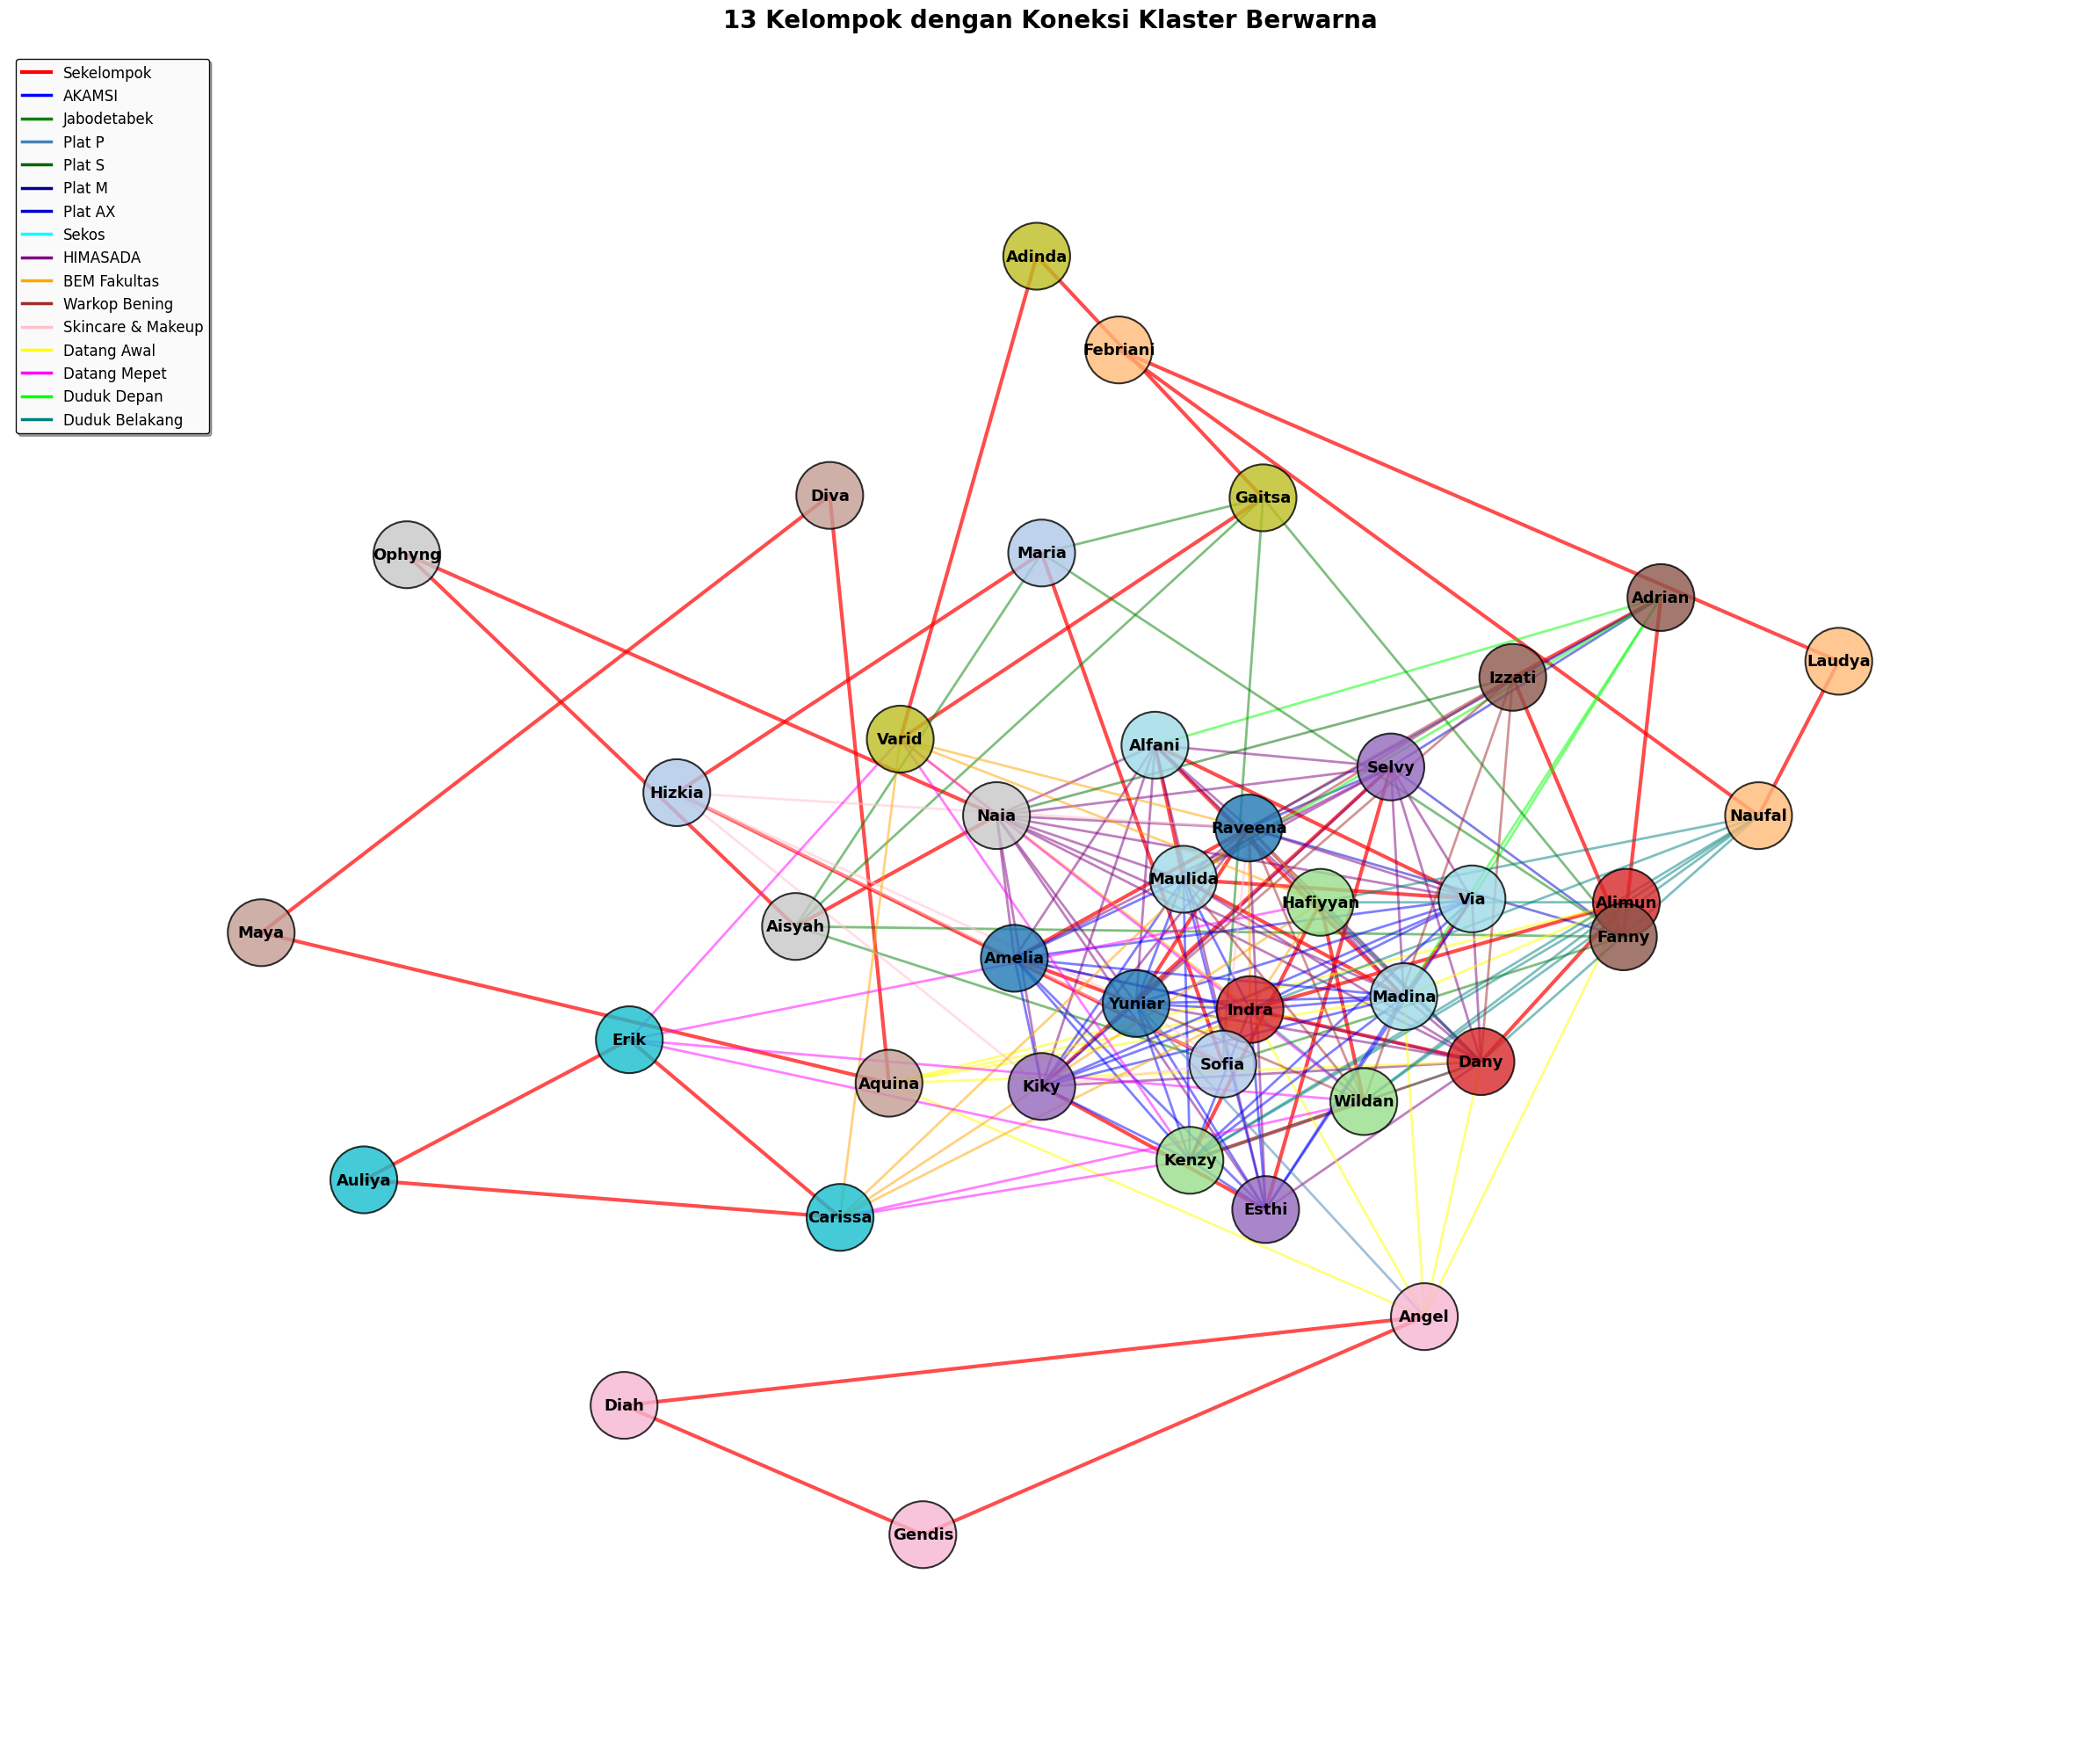

STATISTIK WARNA EDGE
Warna blue: 31 edges
Warna brown: 9 edges
Warna darkgreen: 1 edges
Warna green: 9 edges
Warna lime: 4 edges
Warna magenta: 8 edges
Warna mediumblue: 5 edges
Warna orange: 10 edges
Warna pink: 8 edges
Warna purple: 37 edges
Warna red: 42 edges
Warna steelblue: 1 edges
Warna teal: 12 edges
Warna yellow: 10 edges


In [4]:
# VISUALISASI KELOMPOK
print("VISUALISASI KELOMPOK")

kelompok_list = []
visited = set()

for u, v in sekelompok:
    if u not in visited and v not in visited:
        kelompok = set([u, v])
        for x, y in sekelompok:
            if x in kelompok or y in kelompok:
                kelompok.add(x)
                kelompok.add(y)
        if kelompok not in kelompok_list:
            kelompok_list.append(kelompok)
            visited.update(kelompok)

kelompok_sekelompok = []
sekelompok_graph = nx.Graph()
sekelompok_graph.add_edges_from(sekelompok)
for component in nx.connected_components(sekelompok_graph):
    kelompok_sekelompok.append(list(component))

print(f"\nJumlah kelompok: {len(kelompok_sekelompok)}")
for i, kelompok in enumerate(kelompok_sekelompok, 1):
    print(f"Kelompok {i} ({len(kelompok)} orang): {', '.join(sorted(kelompok))}")

# VISUALISASI KELOMPOK DENGAN WARNA EDGE BERBEDA PER KLASTER
fig, ax1 = plt.subplots(figsize=(24, 20), dpi=100)

pos_sekelompok = nx.spring_layout(G, k=3, iterations=150, seed=42, scale=2)

# Warna berbeda untuk setiap kelompok (nodes)
colors = plt.cm.tab20(np.linspace(0, 1, len(kelompok_sekelompok)))
node_colors_sekelompok = []
node_sizes_sekelompok = []

for node in G.nodes():
    found = False
    for i, kelompok in enumerate(kelompok_sekelompok):
        if node in kelompok:
            node_colors_sekelompok.append(colors[i])
            node_sizes_sekelompok.append(3000)
            found = True
            break
    if not found:
        node_colors_sekelompok.append('#cccccc')
        node_sizes_sekelompok.append(500)

nx.draw_networkx_nodes(G, pos_sekelompok,
                       node_color=node_colors_sekelompok,
                       node_size=node_sizes_sekelompok,
                       alpha=0.8,
                       ax=ax1,
                       edgecolors='black',
                       linewidths=1.5)

edges_by_color = defaultdict(list)

for u, v in G.edges():
    edge_color = G[u][v].get('color', 'gray')
    edges_by_color[edge_color].append((u, v))

if 'red' in edges_by_color:
    nx.draw_networkx_edges(G, pos_sekelompok,
                           edgelist=edges_by_color['red'],
                           edge_color='red',
                           width=3,
                           alpha=0.7,
                           ax=ax1)

for color, edges in edges_by_color.items():
    if color != 'red' and color != 'gray':
        nx.draw_networkx_edges(G, pos_sekelompok,
                               edgelist=edges,
                               edge_color=color,
                               width=2,
                               alpha=0.5,
                               ax=ax1)

if 'gray' in edges_by_color:
    nx.draw_networkx_edges(G, pos_sekelompok,
                           edgelist=edges_by_color['gray'],
                           edge_color='gray',
                           width=1,
                           alpha=0.3,
                           ax=ax1)

labels_sekelompok = {}
for kelompok in kelompok_sekelompok:
    for node in kelompok:
        labels_sekelompok[node] = node

nx.draw_networkx_labels(G, pos_sekelompok, labels_sekelompok,
                        font_size=13,
                        font_weight='bold',
                        font_family='sans-serif',
                        ax=ax1)

ax1.set_title('13 Kelompok dengan Koneksi Klaster Berwarna',
              fontsize=20,
              fontweight='bold',
              pad=20)
ax1.axis('off')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='red', linewidth=3, label='Sekelompok')]
for klaster_name, klaster_data in klaster_info.items():
    legend_elements.append(Line2D([0], [0],
                                  color=klaster_data['color'],
                                  linewidth=2.5,
                                  label=klaster_data['label']))

ax1.legend(handles=legend_elements,
          loc='upper left',
          fontsize=12,
          framealpha=0.95,
          edgecolor='black',
          fancybox=True,
          shadow=True)

# Atur margins agar tidak terpotong
plt.margins(0.1)
plt.tight_layout()
plt.show()

# Cetak statistik warna edge
print("STATISTIK WARNA EDGE")
for color, edges in sorted(edges_by_color.items()):
    print(f"Warna {color}: {len(edges)} edges")

VISUALISASI DISTRIBUSI KLASTER
 


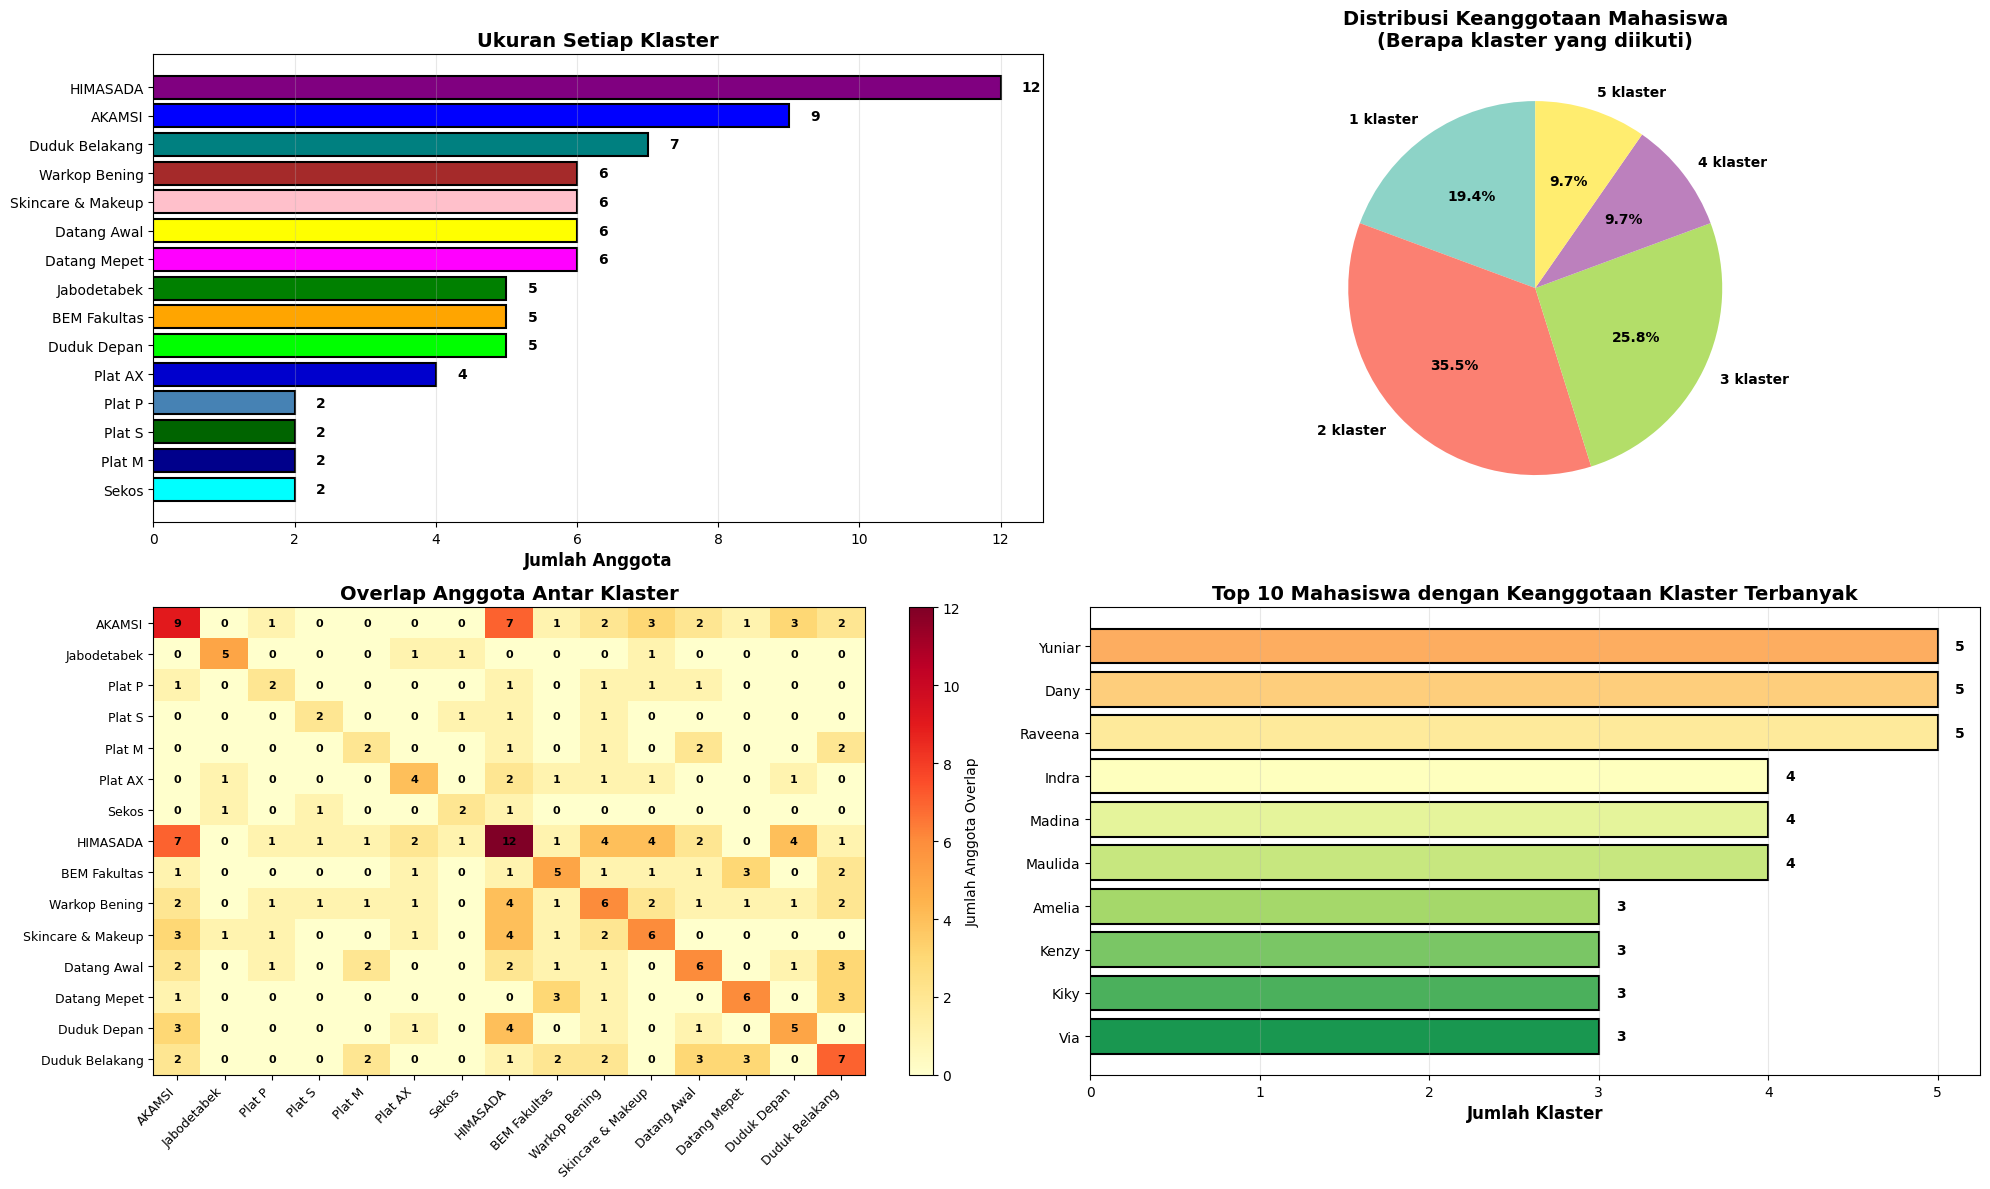


Mahasiswa dengan keanggotaan klaster terbanyak:
1. Yuniar: 5 klaster - AKAMSI, Plat P, HIMASADA, Warkop Bening, Skincare & Makeup
2. Dany: 5 klaster - Plat M, HIMASADA, Warkop Bening, Datang Awal, Duduk Belakang
3. Raveena: 5 klaster - Plat AX, HIMASADA, BEM Fakultas, Warkop Bening, Skincare & Makeup
4. Indra: 4 klaster - AKAMSI, BEM Fakultas, Datang Awal, Duduk Belakang
5. Madina: 4 klaster - AKAMSI, HIMASADA, Datang Awal, Duduk Depan


In [5]:
# VISUALISASI SEMUA KLASTER
print("VISUALISASI DISTRIBUSI KLASTER")
print(" ")

fig = plt.figure(figsize=(20, 12))

# Subplot 1: Bar chart ukuran klaster
ax1 = plt.subplot(2, 2, 1)
klaster_names = [info['label'] for info in klaster_info.values()]
klaster_sizes = [len(info['members']) for info in klaster_info.values()]
klaster_colors = [info['color'] for info in klaster_info.values()]

sorted_data = sorted(zip(klaster_names, klaster_sizes, klaster_colors),
                     key=lambda x: x[1], reverse=True)
sorted_names, sorted_sizes, sorted_colors = zip(*sorted_data)

bars = ax1.barh(sorted_names[::-1], sorted_sizes[::-1],
                color=sorted_colors[::-1], edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Jumlah Anggota', fontsize=12, fontweight='bold')
ax1.set_title('Ukuran Setiap Klaster', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for bar, size in zip(bars, sorted_sizes[::-1]):
    ax1.text(size + 0.3, bar.get_y() + bar.get_height()/2,
             f'{size}', va='center', fontweight='bold')

# Subplot 2: Pie chart distribusi keanggotaan
ax2 = plt.subplot(2, 2, 2)
membership_count = defaultdict(int)
for klaster_data in klaster_info.values():
    for member in klaster_data['members']:
        membership_count[member] += 1

membership_distribution = defaultdict(int)
for count in membership_count.values():
    membership_distribution[count] += 1

labels = [f'{k} klaster' for k in sorted(membership_distribution.keys())]
sizes = [membership_distribution[k] for k in sorted(membership_distribution.keys())]
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(labels)))

wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colors_pie,
                                     autopct='%1.1f%%', startangle=90,
                                     textprops={'fontweight': 'bold'})
ax2.set_title('Distribusi Keanggotaan Mahasiswa\n(Berapa klaster yang diikuti)',
              fontsize=14, fontweight='bold')

# Subplot 3: Heatmap overlap antar klaster
ax3 = plt.subplot(2, 2, 3)
klaster_list = list(klaster_info.keys())
overlap_matrix = np.zeros((len(klaster_list), len(klaster_list)))

for i, k1 in enumerate(klaster_list):
    for j, k2 in enumerate(klaster_list):
        members1 = set(klaster_info[k1]['members'])
        members2 = set(klaster_info[k2]['members'])
        overlap = len(members1.intersection(members2))
        overlap_matrix[i][j] = overlap

im = ax3.imshow(overlap_matrix, cmap='YlOrRd', aspect='auto')
ax3.set_xticks(range(len(klaster_list)))
ax3.set_yticks(range(len(klaster_list)))
ax3.set_xticklabels([klaster_info[k]['label'] for k in klaster_list],
                     rotation=45, ha='right', fontsize=9)
ax3.set_yticklabels([klaster_info[k]['label'] for k in klaster_list], fontsize=9)
ax3.set_title('Overlap Anggota Antar Klaster', fontsize=14, fontweight='bold')

# Tambahkan nilai di setiap sel
for i in range(len(klaster_list)):
    for j in range(len(klaster_list)):
        text = ax3.text(j, i, int(overlap_matrix[i, j]),
                       ha="center", va="center", color="black", fontsize=8,
                       fontweight='bold')

plt.colorbar(im, ax=ax3, label='Jumlah Anggota Overlap')

# Subplot 4: Top members dengan klaster terbanyak
ax4 = plt.subplot(2, 2, 4)
top_members = sorted(membership_count.items(), key=lambda x: x[1], reverse=True)[:10]
member_names = [x[0] for x in top_members]
member_counts = [x[1] for x in top_members]

colors_members = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(member_names)))
bars = ax4.barh(member_names[::-1], member_counts[::-1],
                color=colors_members[::-1], edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Jumlah Klaster', fontsize=12, fontweight='bold')
ax4.set_title('Top 10 Mahasiswa dengan Keanggotaan Klaster Terbanyak',
              fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

for bar, count in zip(bars, member_counts[::-1]):
    ax4.text(count + 0.1, bar.get_y() + bar.get_height()/2,
             f'{count}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detail mahasiswa dengan klaster terbanyak
print("\nMahasiswa dengan keanggotaan klaster terbanyak:")
for i, (nama, count) in enumerate(top_members[:5], 1):
    klaster_list_member = [klaster_info[k]['label'] for k in klaster_info.keys()
                           if nama in klaster_info[k]['members']]
    print(f"{i}. {nama}: {count} klaster - {', '.join(klaster_list_member)}")

## 3 Soal Analisis

      ANALISIS 1: TOP 3 MAHASISWA DENGAN KONEKTIVITAS TERTINGGI       
1. Raveena: 21 koneksi
2. Dany: 20 koneksi
3. Indra: 18 koneksi


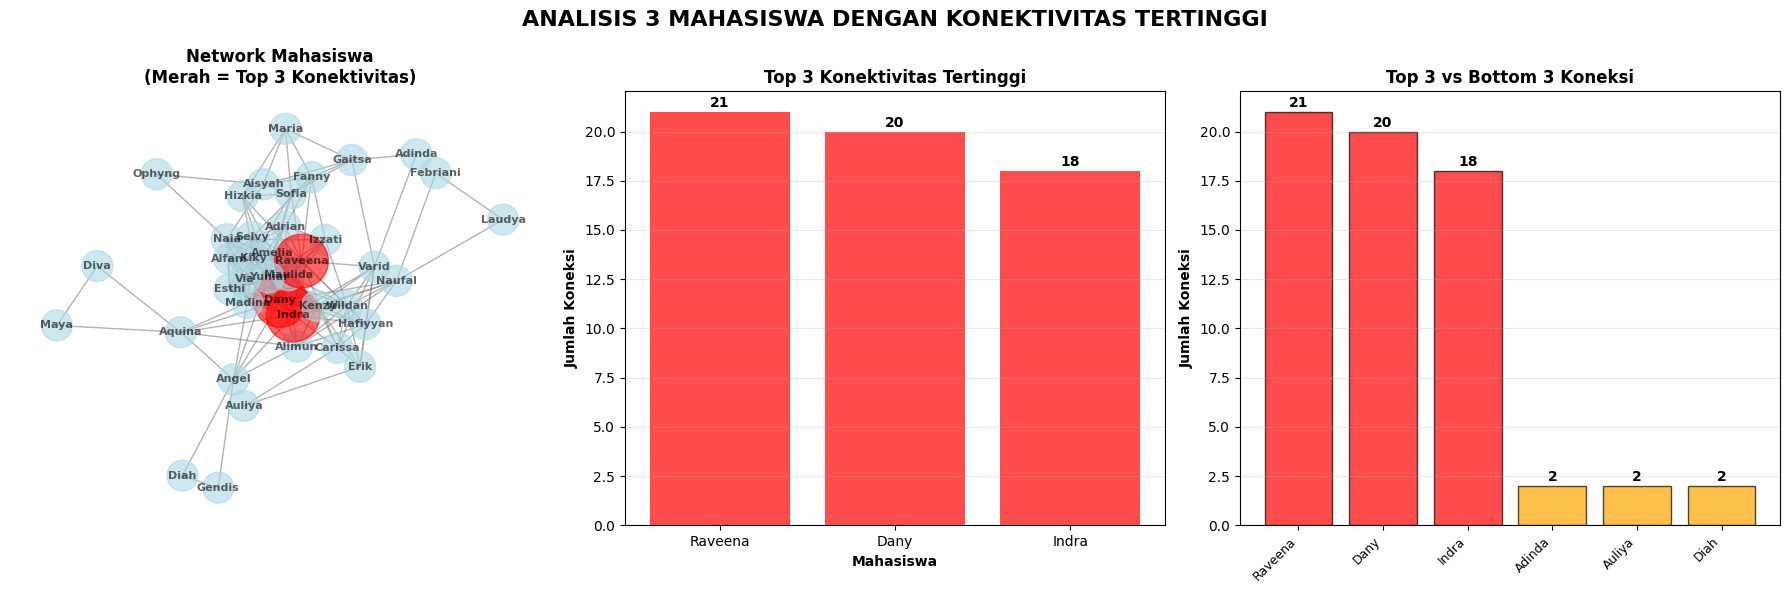


                 SUMMARY SINGKAT                  
Total Mahasiswa: 40
Total Koneksi: 187
Rata-rata Koneksi: 9.35


In [6]:
# ANALISIS 1
# Hitung degree (konektivitas) setiap node
degree_dict = dict(G.degree())

# Urutkan berdasarkan degree dan ambil 3 teratas
top_3 = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]

print("=" * 70)
print("ANALISIS 1: TOP 3 MAHASISWA DENGAN KONEKTIVITAS TERTINGGI".center(70))
print("=" * 70)
for i, (nama, degree) in enumerate(top_3, 1):
    print(f"{i}. {nama}: {degree} koneksi")
print("=" * 70)

# VISUALISASI UTAMA
fig = plt.figure(figsize=(18, 6))

# Plot 1: Network dengan Top 3 highlighted
ax1 = fig.add_subplot(131)
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

node_colors = []
node_sizes = []
for node in G.nodes():
    if node in [top_3[0][0], top_3[1][0], top_3[2][0]]:
        node_colors.append('red')
        node_sizes.append(1500)
    else:
        node_colors.append('lightblue')
        node_sizes.append(500)

ax1.set_title('Network Mahasiswa\n(Merah = Top 3 Konektivitas)', fontsize=12, fontweight='bold')
nx.draw(G, pos, node_color=node_colors, node_size=node_sizes,
        with_labels=True, font_size=8, font_weight='bold',
        edge_color='gray', alpha=0.6, ax=ax1)

# Plot 2: Bar chart Top 3
ax2 = fig.add_subplot(132)
top_names = [item[0] for item in top_3]
top_degrees = [item[1] for item in top_3]

bars = ax2.bar(top_names, top_degrees, color=['red', 'red', 'red'], alpha=0.7)
ax2.set_xlabel('Mahasiswa', fontsize=10, fontweight='bold')
ax2.set_ylabel('Jumlah Koneksi', fontsize=10, fontweight='bold')
ax2.set_title('Top 3 Konektivitas Tertinggi', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Tambahkan nilai pada setiap bar
for bar, value in zip(bars, top_degrees):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(value)}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Perbandingan dengan yang terendah
ax3 = fig.add_subplot(133)
bottom_3 = sorted(degree_dict.items(), key=lambda x: x[1])[:3]

comparison_names = [item[0] for item in top_3] + [item[0] for item in bottom_3]
comparison_values = [item[1] for item in top_3] + [item[1] for item in bottom_3]
comparison_colors = ['red']*3 + ['orange']*3

bars = ax3.bar(comparison_names, comparison_values,
               color=comparison_colors, alpha=0.7, edgecolor='black')
ax3.set_xticks(range(len(comparison_names)))
ax3.set_xticklabels(comparison_names, rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Jumlah Koneksi', fontsize=10, fontweight='bold')
ax3.set_title('Top 3 vs Bottom 3 Koneksi', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Tambahkan nilai pada setiap bar
for bar, value in zip(bars, comparison_values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(value)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.suptitle('ANALISIS 3 MAHASISWA DENGAN KONEKTIVITAS TERTINGGI', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Summary singkat
print("\n" + "=" * 50)
print("SUMMARY SINGKAT".center(50))
print("=" * 50)
print(f"Total Mahasiswa: {len(mahasiswa)}")
print(f"Total Koneksi: {G.number_of_edges()}")
print(f"Rata-rata Koneksi: {np.mean(list(degree_dict.values())):.2f}")
print("=" * 50)


           1. CENTRALITY ANALYSIS (Analisis Peran Sentral)            

Degree Centrality (Berapa banyak koneksi langsung):
  1. Raveena: 0.5385
  2. Dany: 0.5128
  3. Indra: 0.4615

Betweenness Centrality (Seberapa penting sebagai 'jembatan'):
  1. Dany: 0.1202
  2. Indra: 0.1153
  3. Raveena: 0.1138

Closeness Centrality (Seberapa dekat dengan semua orang):
  1. Dany: 0.6290
  2. Indra: 0.6190
  3. Raveena: 0.6190

Eigenvector Centrality (Terhubung dengan orang-orang penting):
  1. Dany: 0.2866
  2. Raveena: 0.2837
  3. Yuniar: 0.2722

              2. CLUSTERING ANALYSIS (Analisis Kelompok)              

Rata-rata Clustering Coefficient: 0.7190
(Seberapa erat teman-temannya saling kenal)

Top 3 Clustering Coefficient:
  1. Adinda: 1.0000
  2. Auliya: 1.0000
  3. Diah: 1.0000

                3. DISTANCE ANALYSIS (Analisis Jarak)                 
Rata-rata Jarak Terpendek: 2.23
Diameter (Jarak terjauh): 5
Radius (Jarak minimum ke semua node): 3

            4. DISTRIBUTION ANALYSIS

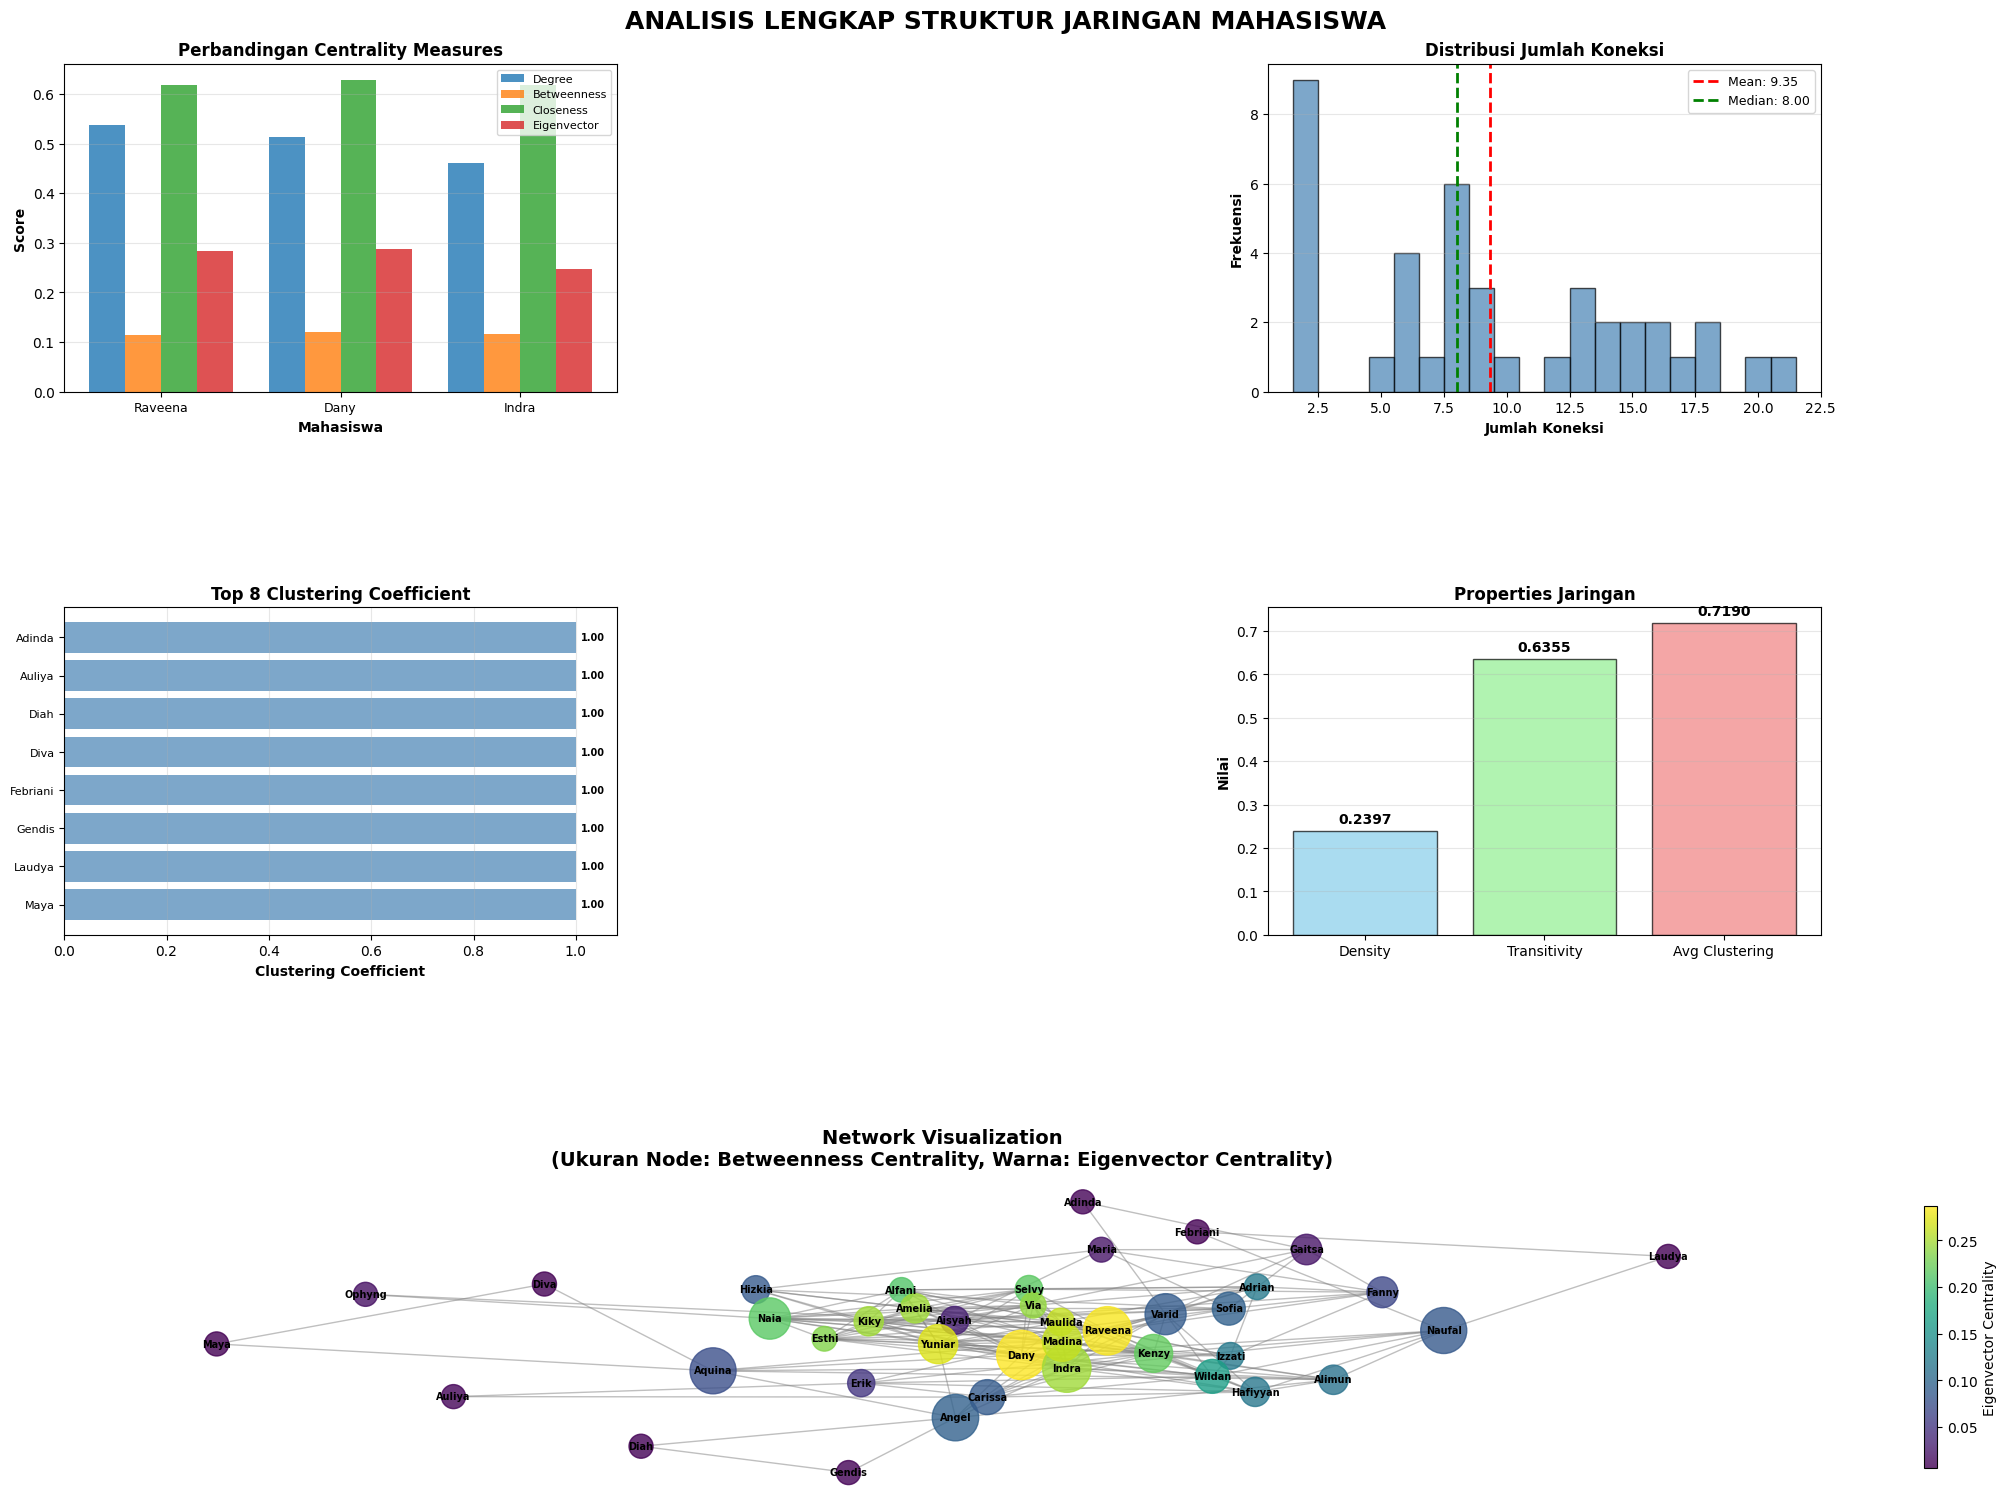


                          SUMMARY STATISTICS                          
Total Mahasiswa        : 40
Total Koneksi          : 187
Rata-rata Koneksi      : 9.35
Network Density        : 0.2397
Average Clustering     : 0.7190
Average Path Length    : 2.23
Transitivity           : 0.6355


In [7]:
# ANALISIS TAMBAHAN DARI NOMOR 1

# 1. CENTRALITY MEASURES (Ukuran kepentingan dalam network)
print("\n" + "=" * 70)
print("1. CENTRALITY ANALYSIS (Analisis Peran Sentral)".center(70))
print("=" * 70)

# Degree Centrality
degree_centrality = nx.degree_centrality(G)
top_degree_cent = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nDegree Centrality (Berapa banyak koneksi langsung):")
for i, (nama, score) in enumerate(top_degree_cent, 1):
    print(f"  {i}. {nama}: {score:.4f}")

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nBetweenness Centrality (Seberapa penting sebagai 'jembatan'):")
for i, (nama, score) in enumerate(top_betweenness, 1):
    print(f"  {i}. {nama}: {score:.4f}")

# Closeness Centrality
closeness = nx.closeness_centrality(G)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nCloseness Centrality (Seberapa dekat dengan semua orang):")
for i, (nama, score) in enumerate(top_closeness, 1):
    print(f"  {i}. {nama}: {score:.4f}")

# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
top_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nEigenvector Centrality (Terhubung dengan orang-orang penting):")
for i, (nama, score) in enumerate(top_eigenvector, 1):
    print(f"  {i}. {nama}: {score:.4f}")

# 2. CLUSTERING & COMMUNITY
print("\n" + "=" * 70)
print("2. CLUSTERING ANALYSIS (Analisis Kelompok)".center(70))
print("=" * 70)

# Clustering Coefficient
clustering_coef = nx.clustering(G)
avg_clustering = nx.average_clustering(G)
top_clustering = sorted(clustering_coef.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"\nRata-rata Clustering Coefficient: {avg_clustering:.4f}")
print("(Seberapa erat teman-temannya saling kenal)")
print("\nTop 3 Clustering Coefficient:")
for i, (nama, score) in enumerate(top_clustering, 1):
    print(f"  {i}. {nama}: {score:.4f}")

# 3. DISTANCE & CONNECTIVITY
print("\n" + "=" * 70)
print("3. DISTANCE ANALYSIS (Analisis Jarak)".center(70))
print("=" * 70)

# Average shortest path
if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)
    radius = nx.radius(G)
    print(f"Rata-rata Jarak Terpendek: {avg_path_length:.2f}")
    print(f"Diameter (Jarak terjauh): {diameter}")
    print(f"Radius (Jarak minimum ke semua node): {radius}")
else:
    print("Graph tidak terhubung sempurna")
    components = list(nx.connected_components(G))
    print(f"Jumlah komponen terpisah: {len(components)}")

# 4. DISTRIBUTION ANALYSIS
print("\n" + "=" * 70)
print("4. DISTRIBUTION ANALYSIS (Analisis Distribusi)".center(70))
print("=" * 70)

degree_dict = dict(G.degree())
degrees = list(degree_dict.values())
print(f"Mean Koneksi: {np.mean(degrees):.2f}")
print(f"Median Koneksi: {np.median(degrees):.2f}")
print(f"Standar Deviasi: {np.std(degrees):.2f}")
print(f"Koneksi Minimum: {min(degrees)}")
print(f"Koneksi Maksimum: {max(degrees)}")
print(f"Range: {max(degrees) - min(degrees)}")

# Degree Distribution
degree_freq = Counter(degrees)
print("\nDistribusi Frekuensi Koneksi:")
for degree in sorted(degree_freq.keys(), reverse=True)[:5]:
    print(f"  {degree} koneksi: {degree_freq[degree]} mahasiswa")

# 6. NETWORK DENSITY & EFFICIENCY
print("\n" + "=" * 70)
print("6. NETWORK PROPERTIES (Properti Jaringan)".center(70))
print("=" * 70)

density = nx.density(G)
print(f"Density: {density:.4f}")
print(f"  Interpretasi: {density*100:.2f}% dari semua kemungkinan koneksi terbentuk")

transitivity = nx.transitivity(G)
print(f"\nTransitivity: {transitivity:.4f}")
print(f"  Interpretasi: Probabilitas 'teman dari teman adalah teman'")

# ========== VISUALISASI EXTENDED (FIXED) ==========
fig = plt.figure(figsize=(20, 15), constrained_layout=True)
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Centrality Comparison
ax1 = fig.add_subplot(gs[0, 0])
top_3 = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]
top_names = [item[0] for item in top_3]

centralities = {
    'Degree': [degree_centrality[name] for name in top_names],
    'Betweenness': [betweenness[name] for name in top_names],
    'Closeness': [closeness[name] for name in top_names],
    'Eigenvector': [eigenvector[name] for name in top_names]
}

x = np.arange(len(top_names))
width = 0.2

for i, (label, values) in enumerate(centralities.items()):
    offset = width * (i - 1.5)
    ax1.bar(x + offset, values, width, label=label, alpha=0.8)

ax1.set_xlabel('Mahasiswa', fontsize=10, fontweight='bold')
ax1.set_ylabel('Score', fontsize=10, fontweight='bold')
ax1.set_title('Perbandingan Centrality Measures', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(top_names, fontsize=9)
ax1.legend(fontsize=8)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Degree Distribution Histogram
ax2 = fig.add_subplot(gs[0, 1])
n, bins, patches = ax2.hist(degrees, bins=range(min(degrees), max(degrees)+2),
                             color='steelblue', alpha=0.7, edgecolor='black', align='left')
ax2.axvline(np.mean(degrees), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(degrees):.2f}')
ax2.axvline(np.median(degrees), color='green', linestyle='--', linewidth=2,
            label=f'Median: {np.median(degrees):.2f}')
ax2.set_xlabel('Jumlah Koneksi', fontsize=10, fontweight='bold')
ax2.set_ylabel('Frekuensi', fontsize=10, fontweight='bold')
ax2.set_title('Distribusi Jumlah Koneksi', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Clustering Coefficient
ax3 = fig.add_subplot(gs[1, 0])
clustering_items = [(name, coef) for name, coef in clustering_coef.items()]
clustering_items_sorted = sorted(clustering_items, key=lambda x: x[1], reverse=True)[:8]  # Kurangi jadi 8 agar muat
names_clust = [item[0] for item in clustering_items_sorted]
values_clust = [item[1] for item in clustering_items_sorted]

colors_clust = ['red' if name in top_names else 'steelblue' for name in names_clust]

bars_clust = ax3.barh(range(len(names_clust)), values_clust, color=colors_clust, alpha=0.7)
ax3.set_yticks(range(len(names_clust)))
ax3.set_yticklabels(names_clust, fontsize=8)  # Perkecil font
ax3.set_xlabel('Clustering Coefficient', fontsize=10, fontweight='bold')
ax3.set_title('Top 8 Clustering Coefficient', fontsize=12, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)
ax3.set_xlim(0, 1.08)

for i, (bar, value) in enumerate(zip(bars_clust, values_clust)):
    ax3.text(value + 0.01, i, f'{value:.2f}',
            va='center', fontsize=7, fontweight='bold')  # Perkecil font

# Plot 4: Network Properties Summary
ax4 = fig.add_subplot(gs[1, 1])
properties = ['Density', 'Transitivity', 'Avg Clustering']
values = [density, transitivity, avg_clustering]
colors = ['skyblue', 'lightgreen', 'lightcoral']

bars = ax4.bar(properties, values, color=colors, alpha=0.7, edgecolor='black')
ax4.set_ylabel('Nilai', fontsize=10, fontweight='bold')
ax4.set_title('Properties Jaringan', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Tambahkan nilai pada bar
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 5: Network dengan berbagai centrality (FULL WIDTH)
ax5 = fig.add_subplot(gs[2, :])
pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)  # Tingkatkan k untuk lebih banyak spacing

# Gunakan betweenness centrality untuk ukuran node
node_sizes = [betweenness[node] * 8000 + 300 for node in G.nodes()]
node_colors = [eigenvector[node] for node in G.nodes()]

# Draw network
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                               node_color=node_colors, cmap='viridis',
                               alpha=0.8, ax=ax5)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, ax=ax5)
nx.draw_networkx_labels(G, pos, font_size=7, font_weight='bold', ax=ax5)

# Tambahkan colorbar
cbar = plt.colorbar(nodes, ax=ax5, shrink=0.8)
cbar.set_label('Eigenvector Centrality', fontsize=10)

ax5.set_title('Network Visualization\n(Ukuran Node: Betweenness Centrality, Warna: Eigenvector Centrality)',
              fontsize=14, fontweight='bold')
ax5.axis('off')  # Matikan axis untuk tampilan yang lebih bersih

plt.suptitle('ANALISIS LENGKAP STRUKTUR JARINGAN MAHASISWA', fontsize=18, fontweight='bold')
plt.show()

# Summary Statistics
print("\n" + "=" * 70)
print("SUMMARY STATISTICS".center(70))
print("=" * 70)
print(f"Total Mahasiswa        : {len(mahasiswa)}")
print(f"Total Koneksi          : {G.number_of_edges()}")
print(f"Rata-rata Koneksi      : {np.mean(degrees):.2f}")
print(f"Network Density        : {density:.4f}")
print(f"Average Clustering     : {avg_clustering:.4f}")
if nx.is_connected(G):
    print(f"Average Path Length    : {avg_path_length:.2f}")
print(f"Transitivity           : {transitivity:.4f}")
print("=" * 70)

=== ANALISIS 2: PASANGAN PALING JAUH KONEKSINYA ===
Jarak terjauh antar node: 5
- Diva ↔ Maria
- Febriani ↔ Maria
- Laudya ↔ Maria
- Maria ↔ Diva
- Maria ↔ Maya
- Maria ↔ Febriani
- Maria ↔ Laudya
- Maya ↔ Maria

=== JALUR KONEKSI TERJAUH ===
Diva → ['Diva', 'Aquina', 'Dany', 'Amelia', 'Hizkia', 'Maria'] → Maria
Febriani → ['Febriani', 'Naufal', 'Dany', 'Amelia', 'Hizkia', 'Maria'] → Maria
Laudya → ['Laudya', 'Naufal', 'Dany', 'Amelia', 'Hizkia', 'Maria'] → Maria
Maria → ['Maria', 'Hizkia', 'Yuniar', 'Angel', 'Aquina', 'Diva'] → Diva
Maria → ['Maria', 'Hizkia', 'Yuniar', 'Angel', 'Aquina', 'Maya'] → Maya
Maria → ['Maria', 'Hizkia', 'Amelia', 'Dany', 'Naufal', 'Febriani'] → Febriani
Maria → ['Maria', 'Hizkia', 'Amelia', 'Dany', 'Naufal', 'Laudya'] → Laudya
Maya → ['Maya', 'Aquina', 'Dany', 'Amelia', 'Hizkia', 'Maria'] → Maria


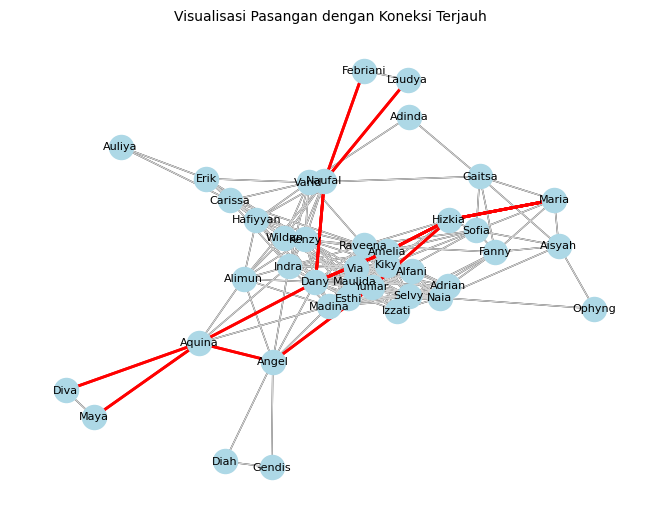


=== ANALISIS TAMBAHAN ===
Rata-rata jarak koneksi sebelum penambahan edge: 2.23
Rata-rata jarak koneksi setelah ditambahkan edge: 2.13
Penguatan konektivitas jaringan meningkat sekitar 4.55% setelah penghubungan langsung.


In [8]:
# ANALISIS 2
# 1. Pasangan yang Paling Jauh Koneksinya
# Hitung jarak terpendek antar semua node
all_pairs = dict(nx.all_pairs_shortest_path_length(G))

max_distance = 0
farthest_pairs = []

# Temukan jarak maksimum dan pasangan yang memiliki jarak tersebut
for node1, distances in all_pairs.items():
    for node2, dist in distances.items():
        if dist > max_distance:
            max_distance = dist
            farthest_pairs = [(node1, node2)]
        elif dist == max_distance:
            farthest_pairs.append((node1, node2))

print("=== ANALISIS 2: PASANGAN PALING JAUH KONEKSINYA ===")
print(f"Jarak terjauh antar node: {max_distance}")
for u, v in farthest_pairs:
    print(f"- {u} ↔ {v}")

# Tampilkan jalur koneksinya
print("\n=== JALUR KONEKSI TERJAUH ===")
for u, v in farthest_pairs:
    path = nx.shortest_path(G, source=u, target=v)
    print(f"{u} → {path} → {v}")

# 2. Visualisasi Jalur Terjauh
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=8)

# Gambar semua edge
nx.draw_networkx_edges(G, pos, edge_color="lightgray")

# Gambar jalur terjauh berwarna merah
for u, v in farthest_pairs:
    path_edges = list(zip(nx.shortest_path(G, u, v)[:-1], nx.shortest_path(G, u, v)[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

plt.title("Visualisasi Pasangan dengan Koneksi Terjauh", fontsize=10)
plt.show()

# 3. Analisis Penguatan Jaringan
print("\n=== ANALISIS TAMBAHAN ===")
avg_dist_before = nx.average_shortest_path_length(G)
print(f"Rata-rata jarak koneksi sebelum penambahan edge: {avg_dist_before:.2f}")

# Simulasikan penambahan edge antar pasangan terjauh
G_temp = G.copy()
for u, v in farthest_pairs:
    G_temp.add_edge(u, v)

avg_dist_after = nx.average_shortest_path_length(G_temp)
print(f"Rata-rata jarak koneksi setelah ditambahkan edge: {avg_dist_after:.2f}")

improvement = ((avg_dist_before - avg_dist_after) / avg_dist_before) * 100
print(f"Penguatan konektivitas jaringan meningkat sekitar {improvement:.2f}% setelah penghubungan langsung.")


ANALISIS 3A: BRIDGE PERSON

Top 5 Bridge Person (Betweenness Centrality):
1. Dany: 0.1202 (koneksi: 20)
2. Indra: 0.1153 (koneksi: 18)
3. Raveena: 0.1138 (koneksi: 21)
4. Angel: 0.1021 (koneksi: 8)
5. Aquina: 0.0999 (koneksi: 7)


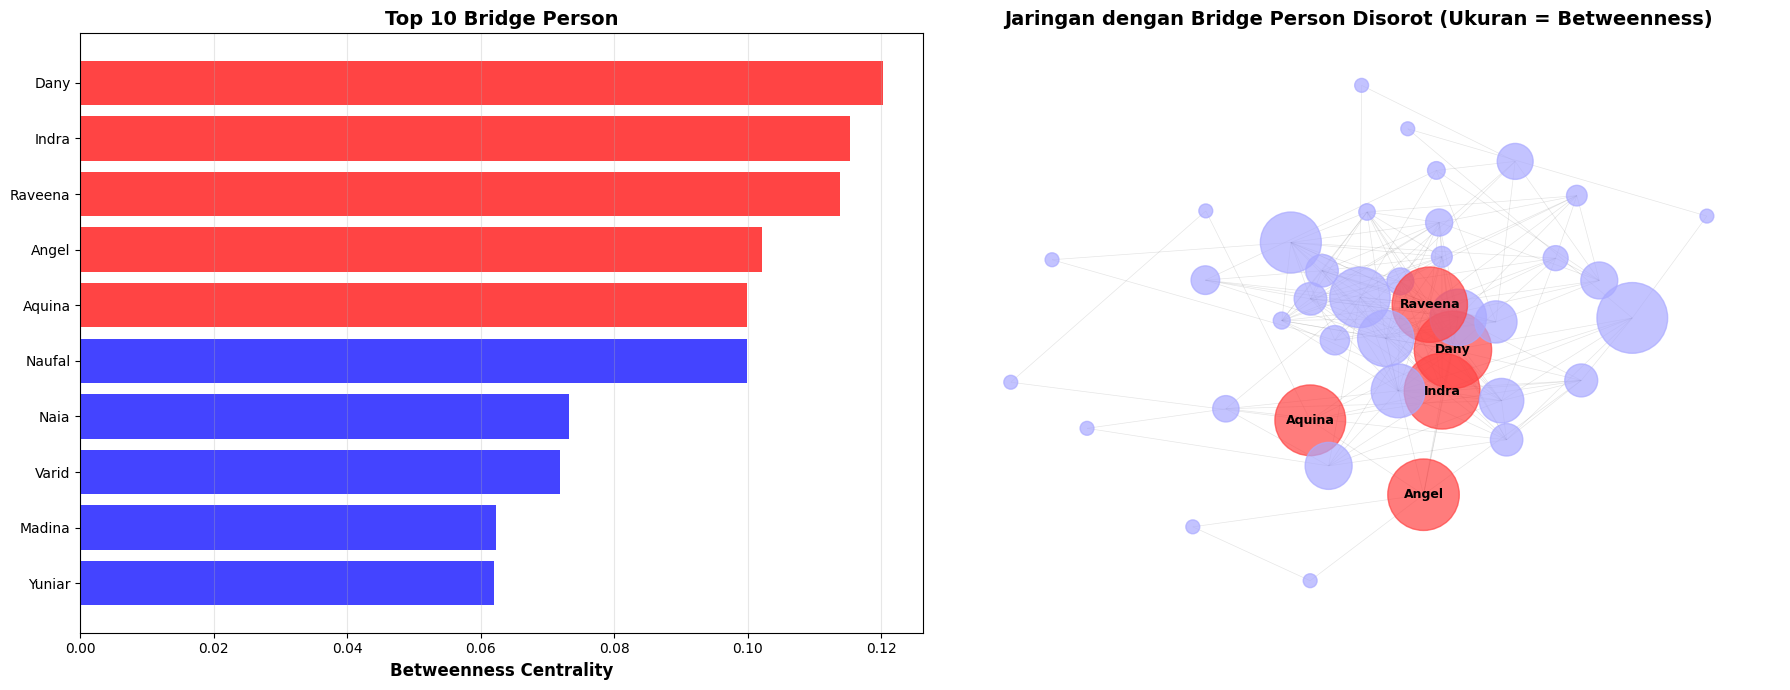

In [9]:
# ANALISIS 3
# a.) BRIDGE PERSON (BETWEENNESS CENTRALITY)
print("ANALISIS 3A: BRIDGE PERSON")

betweenness = nx.betweenness_centrality(G)
top_5_bridge = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 Bridge Person (Betweenness Centrality):")
for i, (nama, nilai) in enumerate(top_5_bridge, 1):
    # Calculate degree for each node
    koneksi = G.degree(nama)
    print(f"{i}. {nama}: {nilai:.4f} (koneksi: {koneksi})")

# VISUALISASI ANALISIS 3A
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Subplot 1: Bar chart betweenness
top_10_bridge = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
names_bridge = [x[0] for x in top_10_bridge]
values_bridge = [x[1] for x in top_10_bridge]
colors_bridge = ['#ff4444' if i < 5 else '#4444ff' for i in range(len(names_bridge))]

ax1.barh(names_bridge[::-1], values_bridge[::-1], color=colors_bridge[::-1])
ax1.set_xlabel('Betweenness Centrality', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Bridge Person', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Subplot 2: Network dengan ukuran node berdasarkan betweenness
pos = nx.spring_layout(G, k=1, iterations=50, seed=42)

# Normalize betweenness untuk ukuran node
betweenness_values = list(betweenness.values())
max_betweenness = max(betweenness_values)
node_sizes = [3000 * (betweenness[node] / max_betweenness) + 100 for node in G.nodes()]

# Warna berdasarkan betweenness
top_5_names = [x[0] for x in top_5_bridge]
node_colors = ['#ff4444' if node in top_5_names else '#aaaaff' for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes,
                       alpha=0.7, ax=ax2)
nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.5, ax=ax2)

# Label hanya untuk top 5
labels_top5 = {node: node for node in top_5_names}
nx.draw_networkx_labels(G, pos, labels_top5, font_size=9, font_weight='bold', ax=ax2)

ax2.set_title('Jaringan dengan Bridge Person Disorot (Ukuran = Betweenness)',
              fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

ANALISIS 3B: BRIDGE PERSON DENGAN KONEKSI MINIMAL

Bridge person dengan koneksi minimal (betweenness tinggi, koneksi rendah):
1. Dany: 20 koneksi, betweenness=0.1202
2. Indra: 18 koneksi, betweenness=0.1153
3. Raveena: 21 koneksi, betweenness=0.1138
4. Angel: 8 koneksi, betweenness=0.1021
5. Aquina: 7 koneksi, betweenness=0.0999
6. Naufal: 8 koneksi, betweenness=0.0999
7. Naia: 14 koneksi, betweenness=0.0732
8. Varid: 9 koneksi, betweenness=0.0719
9. Madina: 17 koneksi, betweenness=0.0623
10. Yuniar: 18 koneksi, betweenness=0.0620


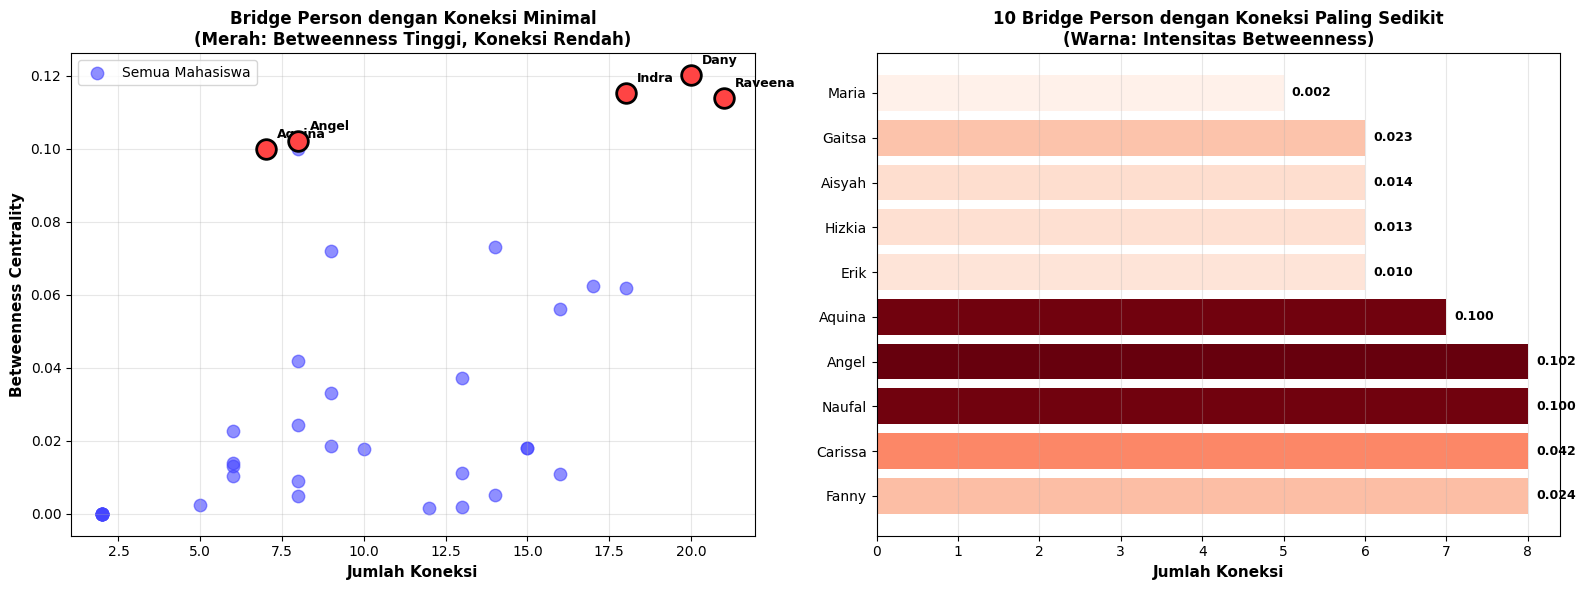

In [10]:
# b.) BRIDGE PERSON DENGAN KONEKSI PALING SEDIKIT
print("ANALISIS 3B: BRIDGE PERSON DENGAN KONEKSI MINIMAL")

# Calculate degrees for all nodes
degree_dict = dict(G.degree())
all_degrees = list(degree_dict.values())

bridge_persons = [(nama, nilai, degree_dict[nama])
                  for nama, nilai in betweenness.items() if nilai > 0]
bridge_sorted = sorted(bridge_persons, key=lambda x: (-x[1], x[2]))

print("\nBridge person dengan koneksi minimal (betweenness tinggi, koneksi rendah):")
for i, (nama, betweenness_val, degree) in enumerate(bridge_sorted[:10], 1):
    print(f"{i}. {nama}: {degree} koneksi, betweenness={betweenness_val:.4f}")

# VISUALISASI: Bridge Person dengan Koneksi Minimal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Scatter plot betweenness vs degree
ax1.scatter(all_degrees, list(betweenness.values()), alpha=0.6, s=80, color='#4444ff', label='Semua Mahasiswa')


# Highlight bridge person dengan koneksi minimal
min_conn_bridge = bridge_sorted[:5]
for nama, bet_val, deg in min_conn_bridge:
    ax1.scatter(deg, bet_val, s=200, color='#ff4444',
                edgecolors='black', linewidths=2, zorder=5)
    ax1.annotate(nama, (deg, bet_val),
                xytext=(8, 8), textcoords='offset points',
                fontweight='bold', fontsize=9)

ax1.set_xlabel('Jumlah Koneksi', fontsize=11, fontweight='bold')
ax1.set_ylabel('Betweenness Centrality', fontsize=11, fontweight='bold')
ax1.set_title('Bridge Person dengan Koneksi Minimal\n(Merah: Betweenness Tinggi, Koneksi Rendah)',
              fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.legend()

# Subplot 2: Top 10 bridge person dengan koneksi paling sedikit
# Sort by degree ascending, then betweenness descending
low_conn_high_bet = sorted(bridge_persons, key=lambda x: (x[2], -x[1]))[:10]
lcb_names = [x[0] for x in low_conn_high_bet]
lcb_degrees = [x[2] for x in low_conn_high_bet]
lcb_betweenness = [x[1] for x in low_conn_high_bet]

# Buat gradient color berdasarkan betweenness
max_lcb_betweenness = max(lcb_betweenness) if lcb_betweenness else 1 # Avoid division by zero
colors_lcb = plt.cm.Reds([x/max_lcb_betweenness for x in lcb_betweenness])

bars = ax2.barh(lcb_names[::-1], lcb_degrees[::-1], color=colors_lcb[::-1])
ax2.set_xlabel('Jumlah Koneksi', fontsize=11, fontweight='bold')
ax2.set_title('10 Bridge Person dengan Koneksi Paling Sedikit\n(Warna: Intensitas Betweenness)',
              fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Tambah nilai pada bar
for i, (bar, bet_val) in enumerate(zip(bars, lcb_betweenness[::-1])):
    width = bar.get_width()
    ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bet_val:.3f}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

ANALISIS 3C: BRIDGE PERSON PALING EFISIEN (tambahan)

Bridge person PALING EFISIEN (rasio betweenness/koneksi tertinggi):
----------------------------------------------------------------------
No   Nama            Efficiency   Betweenness    Koneksi 
----------------------------------------------------------------------
1    Aquina          0.0143       0.0999         7       
2    Angel           0.0128       0.1021         8       
3    Naufal          0.0125       0.0999         8       
4    Varid           0.0080       0.0719         9       
5    Indra           0.0064       0.1153         18      
6    Dany            0.0060       0.1202         20      
7    Raveena         0.0054       0.1138         21      
8    Carissa         0.0052       0.0419         8       
9    Naia            0.0052       0.0732         14      
10   Gaitsa          0.0038       0.0228         6       


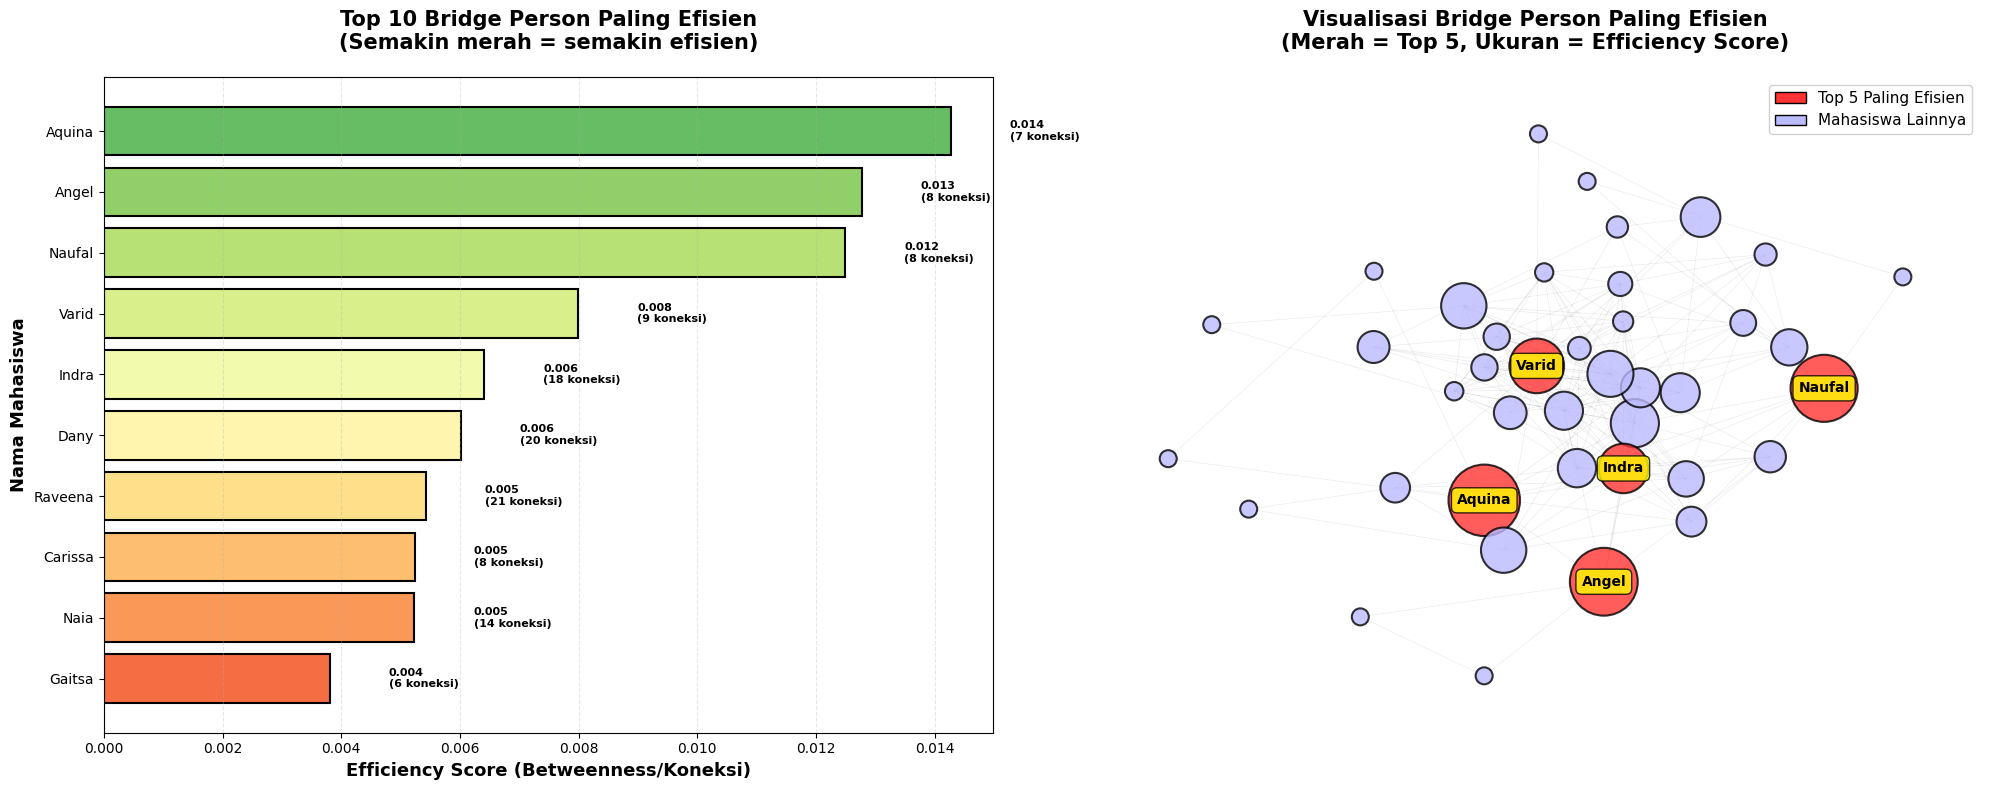

INSIGHT:
• Aquina adalah bridge person paling efisien
  dengan efficiency score 0.0143
• Hanya memiliki 7 koneksi namun betweenness 0.0999


In [11]:
# c.) BRIDGE PERSON DENGAN KONEKSI PALING EFISIEN
print("ANALISIS 3C: BRIDGE PERSON PALING EFISIEN (tambahan)")

# Hitung efficiency score (betweenness/koneksi)
efficiency_score = [(nama, bet_val/deg, bet_val, deg)
                    for nama, bet_val, deg in bridge_persons if deg > 0]
efficiency_sorted = sorted(efficiency_score, key=lambda x: x[1], reverse=True)[:10]

print("\nBridge person PALING EFISIEN (rasio betweenness/koneksi tertinggi):")
print("-" * 70)
print(f"{'No':<4} {'Nama':<15} {'Efficiency':<12} {'Betweenness':<14} {'Koneksi':<8}")
print("-" * 70)
for i, (nama, efficiency, betweenness_val, degree) in enumerate(efficiency_sorted, 1):
    print(f"{i:<4} {nama:<15} {efficiency:<12.4f} {betweenness_val:<14.4f} {degree:<8}")

# VISUALISASI
fig = plt.figure(figsize=(20, 8))

# Subplot 1: Bar chart efficiency score
ax1 = plt.subplot(1, 2, 1)
eff_names = [x[0] for x in efficiency_sorted]
eff_values = [x[1] for x in efficiency_sorted]
eff_betweenness = [x[2] for x in efficiency_sorted]
eff_degrees = [x[3] for x in efficiency_sorted]

# Warna gradient dari merah ke kuning
colors_eff = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(eff_names)))
bars = ax1.barh(eff_names[::-1], eff_values[::-1], color=colors_eff[::-1],
                edgecolor='black', linewidth=1.5)

ax1.set_xlabel('Efficiency Score (Betweenness/Koneksi)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Nama Mahasiswa', fontsize=13, fontweight='bold')
ax1.set_title('Top 10 Bridge Person Paling Efisien\n(Semakin merah = semakin efisien)',
              fontsize=15, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Tambahkan detail di ujung bar
for i, (bar, eff, bet, deg) in enumerate(zip(bars, eff_values[::-1],
                                               eff_betweenness[::-1], eff_degrees[::-1])):
    ax1.text(eff + 0.001, bar.get_y() + bar.get_height()/2,
             f'{eff:.3f}\n({deg} koneksi)', va='center', fontweight='bold', fontsize=8)

# Subplot 2: Network visualization dengan efficiency
ax2 = plt.subplot(1, 2, 2)
pos = nx.spring_layout(G, k=1, iterations=50, seed=42)

# Ukuran node berdasarkan efficiency
efficiency_dict = {name: eff for name, eff, _, _ in efficiency_score}
max_eff = max(efficiency_dict.values()) if efficiency_dict else 1
node_sizes_eff = [2500 * (efficiency_dict.get(node, 0) / max_eff) + 150 for node in G.nodes()]

# Warna: merah untuk top efficient, biru untuk lainnya
top_efficient_names = [x[0] for x in efficiency_sorted[:5]]
node_colors_eff = ['#ff3333' if node in top_efficient_names else '#bbbbff'
                   for node in G.nodes()]

# Draw network
nx.draw_networkx_nodes(G, pos, node_color=node_colors_eff, node_size=node_sizes_eff,
                       alpha=0.8, edgecolors='black', linewidths=1.5, ax=ax2)
nx.draw_networkx_edges(G, pos, alpha=0.08, width=0.5, ax=ax2)

# Label hanya untuk top 5 efficient
labels_eff = {node: node for node in top_efficient_names}
nx.draw_networkx_labels(G, pos, labels_eff, font_size=10, font_weight='bold',
                        bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.8),
                        ax=ax2)

ax2.set_title('Visualisasi Bridge Person Paling Efisien\n(Merah = Top 5, Ukuran = Efficiency Score)',
              fontsize=15, fontweight='bold', pad=20)
ax2.axis('off')

# Tambahkan legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#ff3333', edgecolor='black', label='Top 5 Paling Efisien'),
    Patch(facecolor='#bbbbff', edgecolor='black', label='Mahasiswa Lainnya')
]
ax2.legend(handles=legend_elements, loc='upper right', fontsize=11, framealpha=0.9)

plt.tight_layout()
plt.show()

print("INSIGHT:")
print(f"• {efficiency_sorted[0][0]} adalah bridge person paling efisien")
print(f"  dengan efficiency score {efficiency_sorted[0][1]:.4f}")
print(f"• Hanya memiliki {efficiency_sorted[0][3]} koneksi namun betweenness {efficiency_sorted[0][2]:.4f}")

ANALISIS 3D: KETERSEBARAN PERAN JEMBATAN / BRIDGE DENSITY (tambahan)
Pertanyaan: Apakah peran jembatan hanya dipegang segelintir orang atau tersebar merata?

STATISTIK DISTRIBUSI:
--------------------------------------------------------------------------------
Total mahasiswa:           40
Jumlah bridge person:      31 (77.5%)
Jumlah non-bridge:         9 (22.5%)

KOEFISIEN GINI (Ketimpangan): 0.6132
--------------------------------------------------------------------------------
• SANGAT TERKONSENTRASI - Peran bridge dikuasai segelintir orang
• Gini 0 = merata sempurna, Gini 1 = satu orang kuasai semua

KONSENTRASI PERAN BRIDGE:
--------------------------------------------------------------------------------
Top 5 mahasiswa menguasai:  42.7% peran bridge
Top 10 mahasiswa menguasai: 71.2% peran bridge
Top 20 mahasiswa menguasai: 93.5% peran bridge

TOP 10 BRIDGE PERSON:
--------------------------------------------------------------------------------
 1. Dany           : 0.1202 (9.3% da

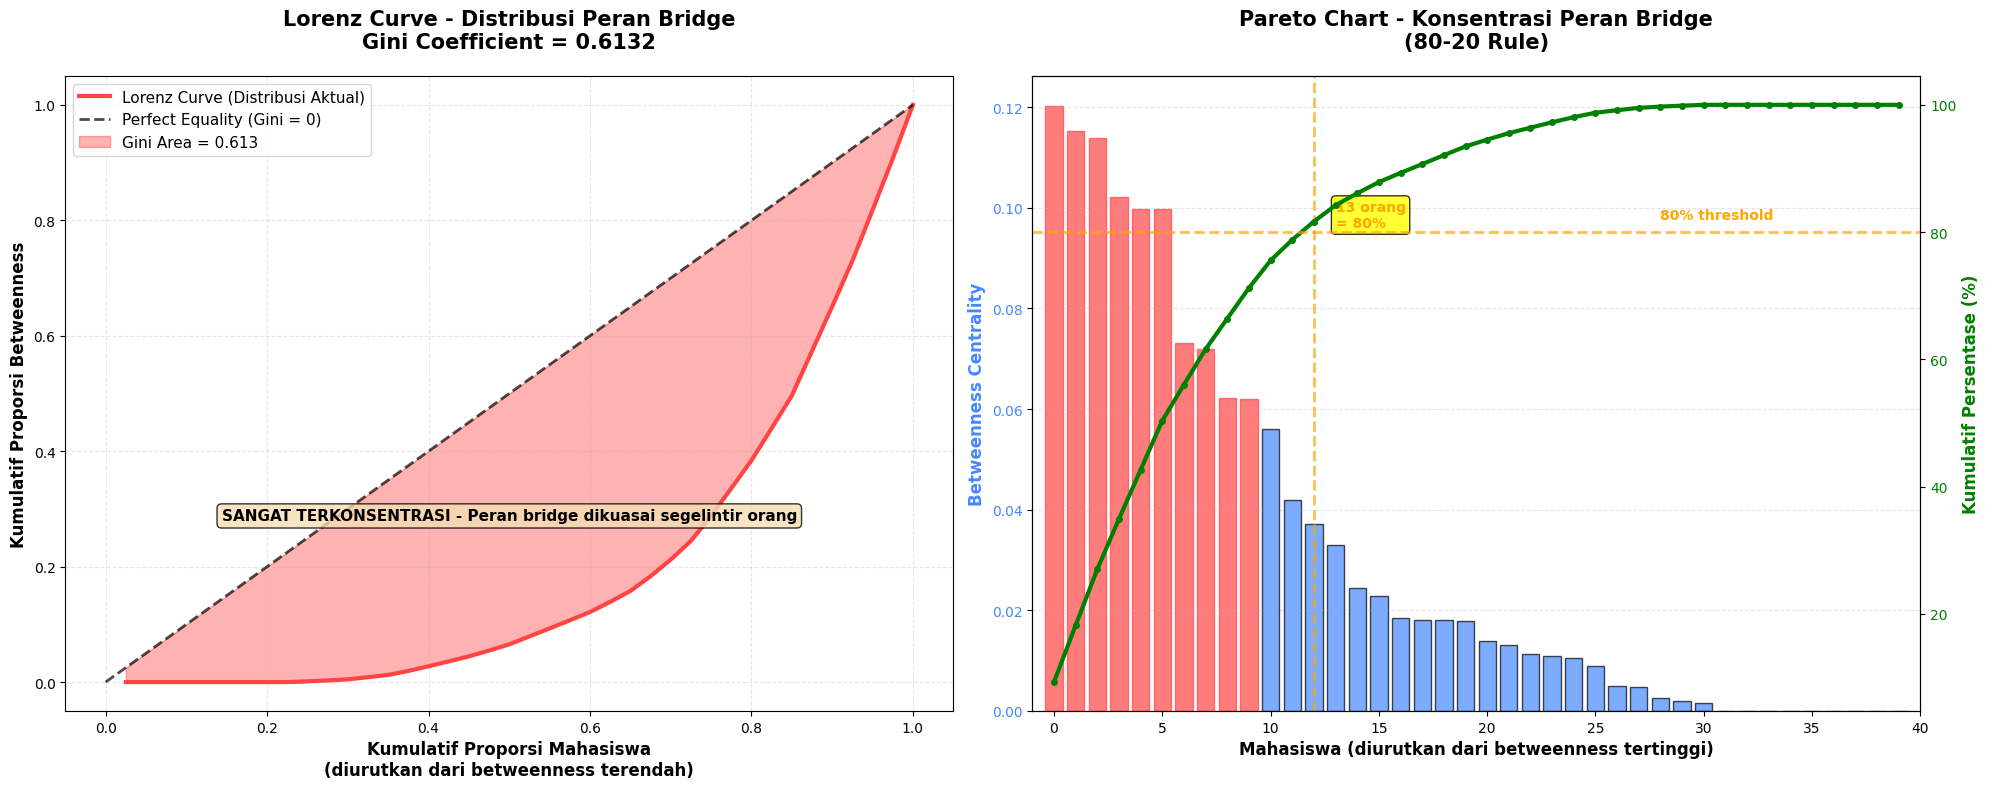

In [12]:
# d.) KETERSEBARAN PERAN JEMBATAN (BRIDGE DENSITY / DISTRIBUSI)
print("ANALISIS 3D: KETERSEBARAN PERAN JEMBATAN / BRIDGE DENSITY (tambahan)")
print("Pertanyaan: Apakah peran jembatan hanya dipegang segelintir orang atau tersebar merata?")

# Hitung statistik distribusi
betweenness_nonzero = [b for b in betweenness_values if b > 0]
total_nodes = len(G.nodes())
bridge_count = len(betweenness_nonzero)
non_bridge_count = total_nodes - bridge_count

print(f"\nSTATISTIK DISTRIBUSI:")
print("-" * 80)
print(f"Total mahasiswa:           {total_nodes}")
print(f"Jumlah bridge person:      {bridge_count} ({bridge_count/total_nodes*100:.1f}%)")
print(f"Jumlah non-bridge:         {non_bridge_count} ({non_bridge_count/total_nodes*100:.1f}%)")

# Hitung konsentrasi (Gini coefficient untuk betweenness)
def gini_coefficient(values):
    sorted_values = np.sort(values)
    n = len(values)
    cumsum = np.cumsum(sorted_values)
    return (2 * np.sum((np.arange(1, n+1)) * sorted_values)) / (n * cumsum[-1]) - (n + 1) / n

gini = gini_coefficient(betweenness_values)

print(f"\nKOEFISIEN GINI (Ketimpangan): {gini:.4f}")
print("-" * 80)
if gini > 0.6:
    interpretasi_gini = "SANGAT TERKONSENTRASI - Peran bridge dikuasai segelintir orang"
elif gini > 0.4:
    interpretasi_gini = "TERKONSENTRASI - Ada ketimpangan signifikan"
elif gini > 0.25:
    interpretasi_gini = "MODERAT - Distribusi cukup merata namun ada yang dominan"
else:
    interpretasi_gini = "MERATA - Peran bridge tersebar relatif adil"

print(f"• {interpretasi_gini}")
print(f"• Gini 0 = merata sempurna, Gini 1 = satu orang kuasai semua")

# Analisis top contributors
total_betweenness = sum(betweenness_values)
sorted_bet = sorted([(node, betweenness[node]) for node in G.nodes()],
                   key=lambda x: x[1], reverse=True)

top5_betweenness = sum([b for _, b in sorted_bet[:5]])
top10_betweenness = sum([b for _, b in sorted_bet[:10]])
top20_betweenness = sum([b for _, b in sorted_bet[:20]])

print(f"\nKONSENTRASI PERAN BRIDGE:")
print("-" * 80)
print(f"Top 5 mahasiswa menguasai:  {top5_betweenness/total_betweenness*100:.1f}% peran bridge")
print(f"Top 10 mahasiswa menguasai: {top10_betweenness/total_betweenness*100:.1f}% peran bridge")
print(f"Top 20 mahasiswa menguasai: {top20_betweenness/total_betweenness*100:.1f}% peran bridge")

print(f"\nTOP 10 BRIDGE PERSON:")
print("-" * 80)
for i, (node, bet) in enumerate(sorted_bet[:10], 1):
    percentage = (bet / total_betweenness) * 100
    print(f"{i:2d}. {node:15s}: {bet:.4f} ({percentage:.1f}% dari total)")

# VISUALISASI
fig = plt.figure(figsize=(20, 8))

# Subplot 1: Lorenz Curve (untuk visualisasi ketimpangan)
ax1 = plt.subplot(1, 2, 1)

sorted_bet_values = np.sort(betweenness_values)
cumsum_bet = np.cumsum(sorted_bet_values)
cumsum_bet_normalized = cumsum_bet / cumsum_bet[-1]
cumsum_population = np.arange(1, len(sorted_bet_values) + 1) / len(sorted_bet_values)

# Plot Lorenz curve
ax1.plot(cumsum_population, cumsum_bet_normalized, linewidth=3,
         color='#ff4444', label='Lorenz Curve (Distribusi Aktual)')

# Plot garis kesetaraan sempurna
ax1.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.7,
         label='Perfect Equality (Gini = 0)')

# Isi area Gini
ax1.fill_between(cumsum_population, cumsum_bet_normalized,
                 cumsum_population, alpha=0.3, color='red',
                 label=f'Gini Area = {gini:.3f}')

ax1.set_xlabel('Kumulatif Proporsi Mahasiswa\n(diurutkan dari betweenness terendah)',
               fontsize=12, fontweight='bold')
ax1.set_ylabel('Kumulatif Proporsi Betweenness', fontsize=12, fontweight='bold')
ax1.set_title(f'Lorenz Curve - Distribusi Peran Bridge\nGini Coefficient = {gini:.4f}',
              fontsize=15, fontweight='bold', pad=20)
ax1.grid(alpha=0.3, linestyle='--')
ax1.legend(loc='upper left', fontsize=11)

# Tambahkan annotasi untuk interpretasi
ax1.text(0.5, 0.3, f'{interpretasi_gini}',
         transform=ax1.transAxes, fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         ha='center')

# Subplot 2: Pareto Chart (80-20 rule)
ax2 = plt.subplot(1, 2, 2)

sorted_names = [node for node, _ in sorted_bet]
sorted_values = [bet for _, bet in sorted_bet]
cumsum_values = np.cumsum(sorted_values)
cumsum_percentage = (cumsum_values / total_betweenness) * 100

# Bar chart
x_pos = np.arange(len(sorted_names))
bars = ax2.bar(x_pos, sorted_values, color='#4488ff',
               edgecolor='black', linewidth=1, alpha=0.7)

# Highlight top 10
for i in range(min(10, len(bars))):
    bars[i].set_color('#ff4444')

# Line chart kumulatif
ax2_twin = ax2.twinx()
ax2_twin.plot(x_pos, cumsum_percentage, color='green',
              linewidth=3, marker='o', markersize=4, label='Kumulatif %')

# Garis 80% dan 20%
ax2_twin.axhline(y=80, color='orange', linestyle='--', linewidth=2, alpha=0.7)
ax2_twin.text(len(sorted_names)*0.7, 82, '80% threshold',
              fontweight='bold', color='orange')

# Cari berapa orang untuk mencapai 80%
idx_80 = np.argmax(cumsum_percentage >= 80)
ax2.axvline(x=idx_80, color='orange', linestyle='--', linewidth=2, alpha=0.7)
ax2.text(idx_80+1, max(sorted_values)*0.8,
         f'{idx_80+1} orang\n= 80%', fontweight='bold', color='orange',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

ax2.set_xlabel('Mahasiswa (diurutkan dari betweenness tertinggi)',
               fontsize=12, fontweight='bold')
ax2.set_ylabel('Betweenness Centrality', fontsize=12, fontweight='bold', color='#4488ff')
ax2_twin.set_ylabel('Kumulatif Persentase (%)', fontsize=12, fontweight='bold', color='green')

ax2.set_title('Pareto Chart - Konsentrasi Peran Bridge\n(80-20 Rule)',
              fontsize=15, fontweight='bold', pad=20)
ax2.set_xlim(-1, 40)  # Fokus ke 40 orang pertama
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Atur warna axis
ax2.tick_params(axis='y', labelcolor='#4488ff')
ax2_twin.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

## Analisis Tambahan


------------------------------------------------------------------------------------------
ANALISIS TAMBAHAN 1: KEPADATAN KLASTER (CLUSTER DENSITY) - BERDASARKAN KONEKSI NATURAL
------------------------------------------------------------------------------------------
Mengukur seberapa solid hubungan NATURAL dalam setiap klaster

-------------------------------------------------------------------------
TABEL KEPADATAN KLASTER NATURAL (Diurutkan dari Tertinggi)
-------------------------------------------------------------------------
Rank  Klaster                Size   Density    Internal   External  
-------------------------------------------------------------------------
1     Plat M                 2      1.000      33.3%      66.7%     
2     Sekos                  2      1.000      33.3%      66.7%     
3     Duduk Depan            5      0.600      75.0%      25.0%     
4     Duduk Belakang         7      0.286      75.0%      25.0%     
5     Skincare & Makeup      6      0.267

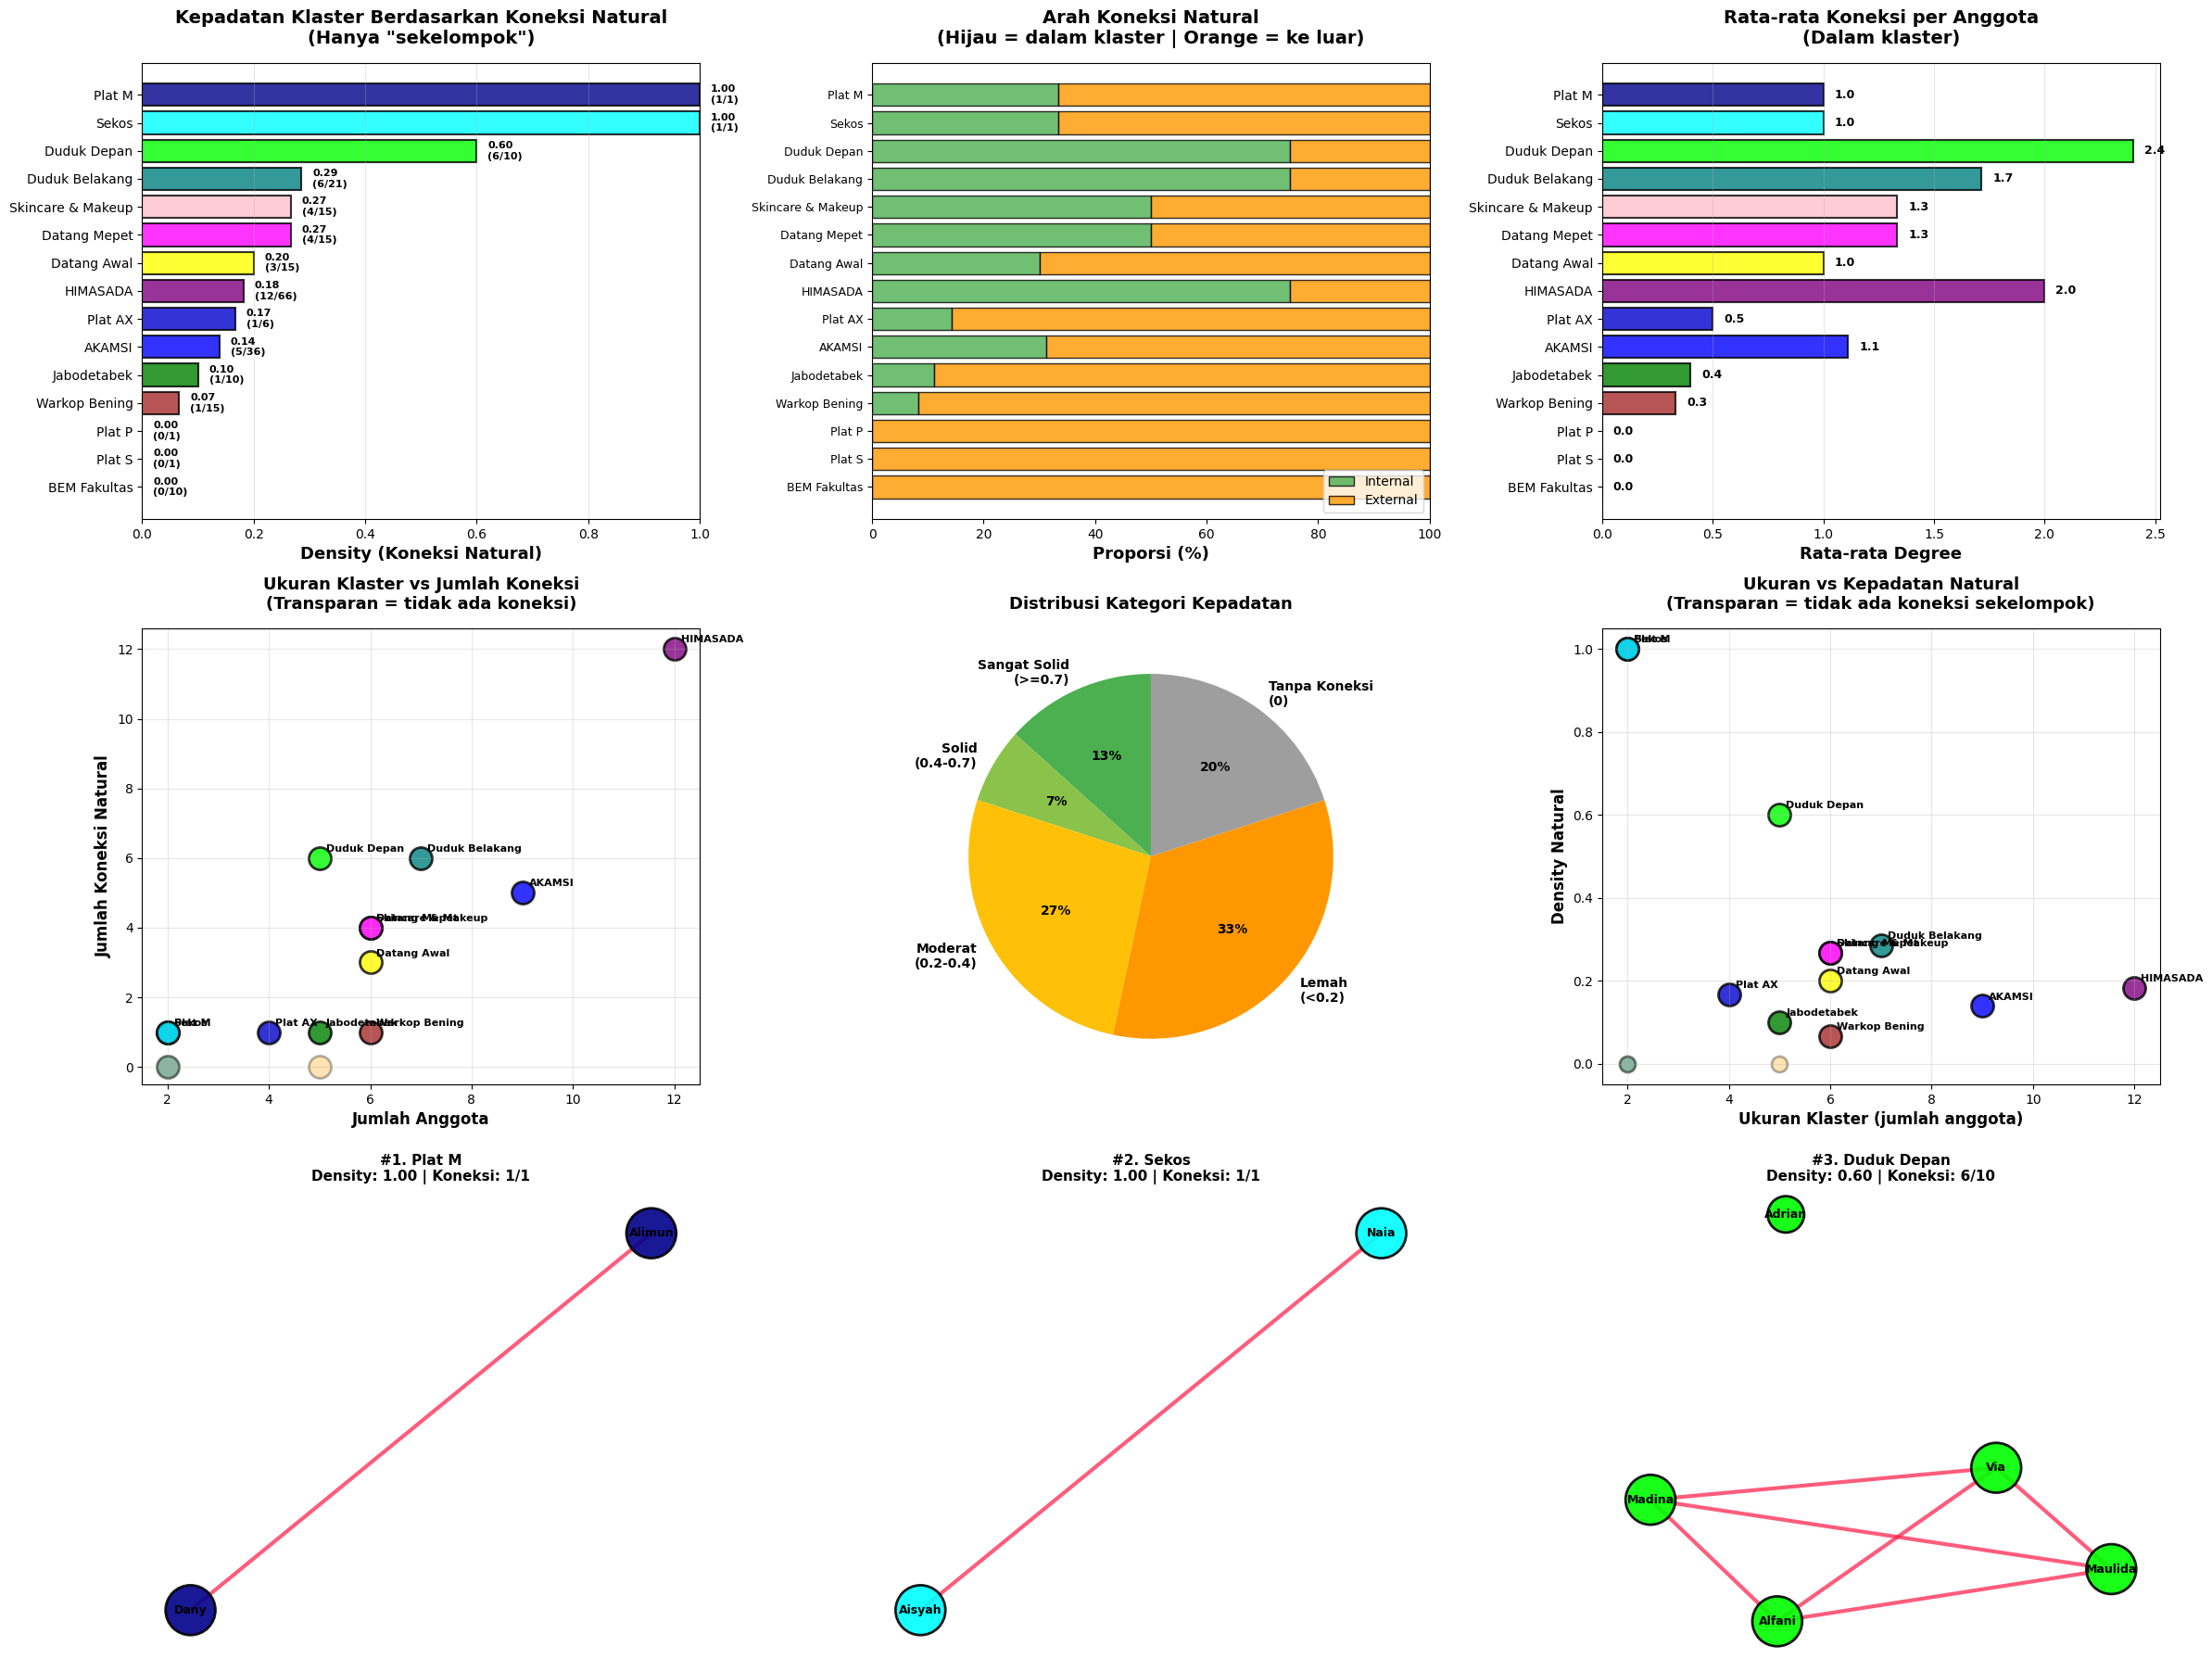


------------------------------------------------------------
ANALISIS MENDALAM
------------------------------------------------------------

TOP 5 KLASTER TERSOLID (Density Natural Tertinggi):
------------------------------------------------------------

1. PLAT M
   Density: 1.000
   Anggota: 2 orang
   Koneksi Sekelompok: 1 dari 1 possible (100.0%)
   Focus: 33% internal, 67% external
   Insight: SUPER SOLID! Mayoritas anggota sekelompok satu sama lain.

2. SEKOS
   Density: 1.000
   Anggota: 2 orang
   Koneksi Sekelompok: 1 dari 1 possible (100.0%)
   Focus: 33% internal, 67% external
   Insight: SUPER SOLID! Mayoritas anggota sekelompok satu sama lain.

3. DUDUK DEPAN
   Density: 0.600
   Anggota: 5 orang
   Koneksi Sekelompok: 6 dari 10 possible (60.0%)
   Focus: 75% internal, 25% external
   Insight: Cukup solid. Banyak anggota yang sekelompok.

4. DUDUK BELAKANG
   Density: 0.286
   Anggota: 7 orang
   Koneksi Sekelompok: 6 dari 21 possible (28.6%)
   Focus: 75% internal, 25% e

In [13]:
print("\n" + "-" * 90)
print("ANALISIS TAMBAHAN 1: KEPADATAN KLASTER (CLUSTER DENSITY) - BERDASARKAN KONEKSI NATURAL")
print("-" * 90)
print("Mengukur seberapa solid hubungan NATURAL dalam setiap klaster")

# Buat graf HANYA dari koneksi sekelompok
G_natural = nx.Graph()
G_natural.add_nodes_from(mahasiswa)
G_natural.add_edges_from(sekelompok)

# Hitung density untuk setiap klaster berdasarkan koneksi natural
cluster_density_stats = []

for klaster_name, klaster_data in klaster_info.items():
    members = klaster_data['members']
    label = klaster_data['label']
    color = klaster_data['color']

    # Buat subgraph untuk klaster ini dari graf natural
    if len(members) > 1:
        subgraph_natural = G_natural.subgraph(members)

        # Hitung metrics
        n_members = len(members)
        n_edges_natural = subgraph_natural.number_of_edges()
        density_natural = nx.density(subgraph_natural)

        # Maksimal possible edges
        max_edges = (n_members * (n_members - 1)) / 2

        # Hitung edges ke luar (koneksi natural ke non-anggota)
        edges_external_natural = 0
        for member in members:
            if member in G_natural:
                for neighbor in G_natural.neighbors(member):
                    if neighbor not in members:
                        edges_external_natural += 1

        # Hitung internal vs external ratio
        total_edges_natural = n_edges_natural + edges_external_natural
        internal_ratio = n_edges_natural / total_edges_natural if total_edges_natural > 0 else 0
        external_ratio = edges_external_natural / total_edges_natural if total_edges_natural > 0 else 0

        # Persentase koneksi yang terbentuk dari maksimal
        coverage = n_edges_natural / max_edges if max_edges > 0 else 0

        # Average degree dalam subgraph
        if n_members > 0:
            degrees = [subgraph_natural.degree(node) for node in members]
            avg_degree = np.mean(degrees)
        else:
            avg_degree = 0

        cluster_density_stats.append({
            'klaster_name': klaster_name,
            'label': label,
            'color': color,
            'n_members': n_members,
            'density': density_natural,
            'n_edges_natural': n_edges_natural,
            'max_edges': int(max_edges),
            'coverage': coverage,
            'edges_external': edges_external_natural,
            'internal_ratio': internal_ratio,
            'external_ratio': external_ratio,
            'avg_degree': avg_degree,
            'total_edges': total_edges_natural
        })

# Sort by density
cluster_density_stats.sort(key=lambda x: x['density'], reverse=True)

# Print tabel
print("\n" + "-" * 73)
print("TABEL KEPADATAN KLASTER NATURAL (Diurutkan dari Tertinggi)")
print("-" * 73)
print(f"{'Rank':<5} {'Klaster':<22} {'Size':<6} {'Density':<10} {'Internal':<10} {'External':<10}")
print("-" * 73)

for i, stat in enumerate(cluster_density_stats, 1):
    print(f"{i:<5} {stat['label']:<22} {stat['n_members']:<6} "
          f"{stat['density']:<10.3f} "
          f"{stat['internal_ratio']:<10.1%} "
          f"{stat['external_ratio']:<10.1%}")

print("\nINTERPRETASI:")
print("- Density: 0-1, seberapa banyak anggota saling terhubung secara NATURAL (sekelompok)")
print("- Internal: Persentase dari koneksi natural anggota yang mengarah ke sesama klaster")
print("- External: Persentase dari koneksi natural anggota yang mengarah ke luar klaster")

# Kategorisasi klaster
print("\n" + "-" * 60)
print("KATEGORISASI KLASTER BERDASARKAN KONEKSI NATURAL")
print("-" *60)

very_solid = [s for s in cluster_density_stats if s['density'] >= 0.7]
solid = [s for s in cluster_density_stats if 0.4 <= s['density'] < 0.7]
moderate = [s for s in cluster_density_stats if 0.2 <= s['density'] < 0.4]
loose = [s for s in cluster_density_stats if 0 < s['density'] < 0.2]
no_connection = [s for s in cluster_density_stats if s['density'] == 0]

if very_solid:
    print(f"\nSANGAT SOLID (Density >= 0.7): {len(very_solid)} klaster")
    for stat in very_solid:
        print(f"   - {stat['label']}: {stat['density']:.3f} ({stat['n_edges_natural']}/{int(stat['max_edges'])} koneksi) - WOW! Sangat erat!")

if solid:
    print(f"\nSOLID (Density 0.4-0.7): {len(solid)} klaster")
    for stat in solid:
        print(f"   - {stat['label']}: {stat['density']:.3f} ({stat['n_edges_natural']}/{int(stat['max_edges'])} koneksi) - Cukup erat")

if moderate:
    print(f"\nMODERAT (Density 0.2-0.4): {len(moderate)} klaster")
    for stat in moderate:
        print(f"   - {stat['label']}: {stat['density']:.3f} ({stat['n_edges_natural']}/{int(stat['max_edges'])} koneksi) - Ada beberapa koneksi")

if loose:
    print(f"\nLEMAH (Density 0-0.2): {len(loose)} klaster")
    for stat in loose:
        print(f"   - {stat['label']}: {stat['density']:.3f} ({stat['n_edges_natural']}/{int(stat['max_edges'])} koneksi) - Koneksi sangat sedikit")

if no_connection:
    print(f"\nTIDAK ADA KONEKSI NATURAL: {len(no_connection)} klaster")
    for stat in no_connection:
        print(f"   - {stat['label']}: {stat['density']:.3f} (0/{int(stat['max_edges'])} koneksi) - Tidak ada yang sekelompok!")

# VISUALISASI
fig = plt.figure(figsize=(24, 18))

# Baris 1: Density Comparison, Rata-rata Koneksi, Arah Koneksi
# Subplot 1: Bar Chart - Density Comparison
ax1 = plt.subplot(3, 3, 1)
labels_list = [s['label'] for s in cluster_density_stats]
density_list = [s['density'] for s in cluster_density_stats]
colors_list = [s['color'] for s in cluster_density_stats]

bars = ax1.barh(labels_list[::-1], density_list[::-1],
                color=colors_list[::-1], edgecolor='black', linewidth=1.5, alpha=0.8)

ax1.set_xlabel('Density (Koneksi Natural)', fontsize=13, fontweight='bold')
ax1.set_title('Kepadatan Klaster Berdasarkan Koneksi Natural\n(Hanya "sekelompok")',
              fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3)
ax1.set_xlim(0, 1)

# Tambahkan nilai di ujung bar
for bar, density, stat in zip(bars, density_list[::-1], cluster_density_stats[::-1]):
    label_text = f"{density:.2f}\n({stat['n_edges_natural']}/{int(stat['max_edges'])})"
    ax1.text(density + 0.02, bar.get_y() + bar.get_height()/2,
            label_text, va='center', fontweight='bold', fontsize=8)

# Subplot 2: Internal vs External (pindah dari posisi 3)
ax2 = plt.subplot(3, 3, 2)

# Filter yang punya koneksi
clusters_with_connections = [s for s in cluster_density_stats if s['total_edges'] > 0]
if clusters_with_connections:
    labels_conn = [s['label'] for s in clusters_with_connections]
    internal_ratios = [s['internal_ratio'] * 100 for s in clusters_with_connections]
    external_ratios = [s['external_ratio'] * 100 for s in clusters_with_connections]

    y_pos = np.arange(len(labels_conn))
    ax2.barh(y_pos, internal_ratios[::-1], label='Internal',
             color='#4CAF50', edgecolor='black', linewidth=1, alpha=0.8)
    ax2.barh(y_pos, external_ratios[::-1], left=internal_ratios[::-1],
             label='External', color='#FF9800', edgecolor='black', linewidth=1, alpha=0.8)

    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(labels_conn[::-1], fontsize=9)
    ax2.set_xlabel('Proporsi (%)', fontsize=13, fontweight='bold')
    ax2.set_title('Arah Koneksi Natural\n(Hijau = dalam klaster | Orange = ke luar)',
                  fontsize=14, fontweight='bold', pad=15)
    ax2.legend(loc='lower right', fontsize=10)
    ax2.set_xlim(0, 100)
else:
    ax2.text(0.5, 0.5, 'Tidak ada koneksi natural',
             ha='center', va='center', fontsize=12, transform=ax2.transAxes)
    ax2.axis('off')

# Subplot 3: Average Degree per Cluster (pindah dari posisi 2)
ax3 = plt.subplot(3, 3, 3)
avg_degree_list = [s['avg_degree'] for s in cluster_density_stats]

bars3 = ax3.barh(labels_list[::-1], avg_degree_list[::-1],
                 color=colors_list[::-1], edgecolor='black', linewidth=1.5, alpha=0.8)

ax3.set_xlabel('Rata-rata Degree', fontsize=13, fontweight='bold')
ax3.set_title('Rata-rata Koneksi per Anggota\n(Dalam klaster)',
              fontsize=14, fontweight='bold', pad=15)
ax3.grid(axis='x', alpha=0.3)

for bar, deg in zip(bars3, avg_degree_list[::-1]):
    ax3.text(deg + 0.05, bar.get_y() + bar.get_height()/2,
            f'{deg:.1f}', va='center', fontweight='bold', fontsize=9)

# Baris 2: Ukuran vs Jumlah Koneksi, Distribusi Kategori, Ukuran vs Density
# Subplot 4: Scatter - Edges vs Members
ax4 = plt.subplot(3, 3, 4)

for stat in cluster_density_stats:
    marker_size = 300
    alpha_val = 0.8 if stat['n_edges_natural'] > 0 else 0.3
    ax4.scatter(stat['n_members'], stat['n_edges_natural'],
               s=marker_size, color=stat['color'], edgecolors='black',
               linewidths=2, alpha=alpha_val)
    if stat['n_edges_natural'] > 0:
        ax4.annotate(stat['label'], (stat['n_members'], stat['n_edges_natural']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, fontweight='bold')

ax4.set_xlabel('Jumlah Anggota', fontsize=12, fontweight='bold')
ax4.set_ylabel('Jumlah Koneksi Natural', fontsize=12, fontweight='bold')
ax4.set_title('Ukuran Klaster vs Jumlah Koneksi\n(Transparan = tidak ada koneksi)',
              fontsize=13, fontweight='bold', pad=15)
ax4.grid(alpha=0.3)
ax4.set_ylim(bottom=-0.5)

# Subplot 5: Pie Chart - Distribusi Kategori
ax5 = plt.subplot(3, 3, 5)
categories = ['Sangat Solid\n(>=0.7)', 'Solid\n(0.4-0.7)', 'Moderat\n(0.2-0.4)',
              'Lemah\n(<0.2)', 'Tanpa Koneksi\n(0)']
cat_counts = [len(very_solid), len(solid), len(moderate), len(loose), len(no_connection)]
cat_colors = ['#4CAF50', '#8BC34A', '#FFC107', '#FF9800', '#9E9E9E']

# Filter kategori yang ada isinya
cat_filtered = [(cat, count, color) for cat, count, color in zip(categories, cat_counts, cat_colors) if count > 0]
if cat_filtered:
    cats, counts, colors = zip(*cat_filtered)
    wedges, texts, autotexts = ax5.pie(counts, labels=cats, colors=colors,
                                         autopct='%1.0f%%', startangle=90,
                                         textprops={'fontweight': 'bold', 'fontsize': 10})
    ax5.set_title('Distribusi Kategori Kepadatan', fontsize=13, fontweight='bold', pad=15)

# Subplot 6: Scatter - Size vs Density
ax6 = plt.subplot(3, 3, 6)
sizes = [s['n_members'] for s in cluster_density_stats]
densities = [s['density'] for s in cluster_density_stats]

for stat in cluster_density_stats:
    marker_size = 300 if stat['n_edges_natural'] > 0 else 150
    alpha_val = 0.8 if stat['n_edges_natural'] > 0 else 0.3
    ax6.scatter(stat['n_members'], stat['density'],
               s=marker_size, color=stat['color'], edgecolors='black',
               linewidths=2, alpha=alpha_val)
    if stat['n_edges_natural'] > 0:
        ax6.annotate(stat['label'], (stat['n_members'], stat['density']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, fontweight='bold')

ax6.set_xlabel('Ukuran Klaster (jumlah anggota)', fontsize=12, fontweight='bold')
ax6.set_ylabel('Density Natural', fontsize=12, fontweight='bold')
ax6.set_title('Ukuran vs Kepadatan Natural\n(Transparan = tidak ada koneksi sekelompok)',
              fontsize=13, fontweight='bold', pad=15)
ax6.grid(alpha=0.3)
ax6.set_ylim(-0.05, 1.05)

# Baris 3: Visualisasi Top 3 Klaster
clusters_to_visualize = [s for s in cluster_density_stats if s['n_edges_natural'] > 0][:3]

for idx, stat in enumerate(clusters_to_visualize):
    ax = plt.subplot(3, 3, 7 + idx)

    members = klaster_info[stat['klaster_name']]['members']
    subgraph = G_natural.subgraph(members)

    # Layout
    if len(members) <= 3:
        pos_sub = nx.circular_layout(subgraph)
    else:
        pos_sub = nx.spring_layout(subgraph, k=1.8, iterations=50, seed=42)

    # Node colors
    node_colors_sub = [stat['color']] * len(members)
    node_sizes_sub = [1500 if subgraph.degree(m) > 0 else 800 for m in members]

    # Draw
    nx.draw_networkx_nodes(subgraph, pos_sub,
                          node_color=node_colors_sub,
                          node_size=node_sizes_sub,
                          alpha=0.9,
                          edgecolors='black',
                          linewidths=2,
                          ax=ax)

    if subgraph.number_of_edges() > 0:
        nx.draw_networkx_edges(subgraph, pos_sub,
                              edge_color='#FF1744',
                              width=3,
                              alpha=0.7,
                              ax=ax)

    nx.draw_networkx_labels(subgraph, pos_sub,
                           font_size=9,
                           font_weight='bold',
                           ax=ax)

    # Title dengan info
    title_text = f"#{idx+1}. {stat['label']}\n"
    title_text += f"Density: {stat['density']:.2f} | "
    title_text += f"Koneksi: {stat['n_edges_natural']}/{int(stat['max_edges'])}"

    ax.set_title(title_text, fontsize=11, fontweight='bold', pad=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

# ANALISIS MENDALAM
print("\n" + "-" * 60)
print("ANALISIS MENDALAM")
print("-" * 60)

# Top 5 Tersolid
clusters_with_edges = [s for s in cluster_density_stats if s['n_edges_natural'] > 0]
if clusters_with_edges:
    print("\nTOP 5 KLASTER TERSOLID (Density Natural Tertinggi):")
    print("-" * 60)
    for i, stat in enumerate(clusters_with_edges[:5], 1):
        print(f"\n{i}. {stat['label'].upper()}")
        print(f"   Density: {stat['density']:.3f}")
        print(f"   Anggota: {stat['n_members']} orang")
        print(f"   Koneksi Sekelompok: {stat['n_edges_natural']} dari {int(stat['max_edges'])} possible ({stat['coverage']:.1%})")
        print(f"   Focus: {stat['internal_ratio']:.0%} internal, {stat['external_ratio']:.0%} external")
        print(f"   Insight: ", end="")

        if stat['density'] >= 0.7:
            print("SUPER SOLID! Mayoritas anggota sekelompok satu sama lain.")
        elif stat['density'] >= 0.4:
            print("Cukup solid. Banyak anggota yang sekelompok.")
        else:
            print("Ada beberapa koneksi sekelompok di antara anggota.")

# Klaster tanpa koneksi natural
if no_connection:
    print(f"\n\nKLASTER TANPA KONEKSI SEKELOMPOK ({len(no_connection)} klaster):")
    print("-" * 60)
    print("Klaster ini anggotanya TIDAK ada yang sekelompok satu sama lain:")
    for stat in no_connection:
        print(f"   - {stat['label']} ({stat['n_members']} anggota)")
    print("\nCatatan: Ini menunjukkan klaster berdasarkan kriteria lain (asal daerah, kegiatan, dll)")
    print("bukan dari hubungan pertemanan natural yang sudah ada.")

# Summary Statistics
print("\n\n" + "-" * 60)
print("STATISTIK KESELURUHAN")
print("-" * 60)
total_natural_edges = sum([s['n_edges_natural'] for s in cluster_density_stats])
avg_density = np.mean([s['density'] for s in cluster_density_stats])
avg_coverage = np.mean([s['coverage'] for s in cluster_density_stats])

clusters_with_conn = [s for s in cluster_density_stats if s['n_edges_natural'] > 0]
if clusters_with_conn:
    avg_density_with_conn = np.mean([s['density'] for s in clusters_with_conn])
    print(f"Rata-rata Density (semua klaster): {avg_density:.3f}")
    print(f"Rata-rata Density (klaster dengan koneksi): {avg_density_with_conn:.3f}")
    print(f"Rata-rata Coverage: {avg_coverage:.1%}")
    print(f"Total koneksi sekelompok dalam klaster: {total_natural_edges}")
    print(f"Klaster dengan koneksi: {len(clusters_with_conn)}/{len(cluster_density_stats)}")
    print(f"\nKlaster Tersolid: {clusters_with_conn[0]['label']} ({clusters_with_conn[0]['density']:.3f})")

ANALISIS TAMBAHAN 2: ANALISIS STRUKTUR DAN OPTIMASI JARINGAN

=== ANALISIS KOMUNITAS TERISOLASI ===
Jumlah komunitas terdeteksi: 3
Komunitas 1: ['Maria', 'Adrian', 'Alfani', 'Yuniar', 'Amelia', 'Aisyah', 'Fanny', 'Kiky', 'Ophyng', 'Esthi', 'Raveena', 'Sofia', 'Maulida', 'Madina', 'Via', 'Hizkia', 'Izzati', 'Naia', 'Selvy']
Komunitas 2: ['Gaitsa', 'Wildan', 'Laudya', 'Alimun', 'Febriani', 'Carissa', 'Hafiyyan', 'Kenzy', 'Erik', 'Auliya', 'Naufal', 'Indra', 'Adinda', 'Varid']
Komunitas 3: ['Dany', 'Diva', 'Gendis', 'Maya', 'Angel', 'Diah', 'Aquina']

=== JARAK ANTAR KOMUNITAS ===
Komunitas 1 ↔ Komunitas 2: Jarak 1 via ('Maria', 'Gaitsa')
Komunitas 1 ↔ Komunitas 3: Jarak 1 via ('Alfani', 'Dany')
Komunitas 2 ↔ Komunitas 3: Jarak 1 via ('Wildan', 'Dany')

=== ANALISIS ECCENTRICITY (NODE PINGGIRAN) ===
Diameter jaringan: 5
Radius jaringan: 3
Center nodes (paling sentral): ['Alfani', 'Amelia', 'Angel', 'Carissa', 'Dany', 'Esthi', 'Hafiyyan', 'Indra', 'Izzati', 'Kenzy', 'Kiky', 'Madina', 'Maul

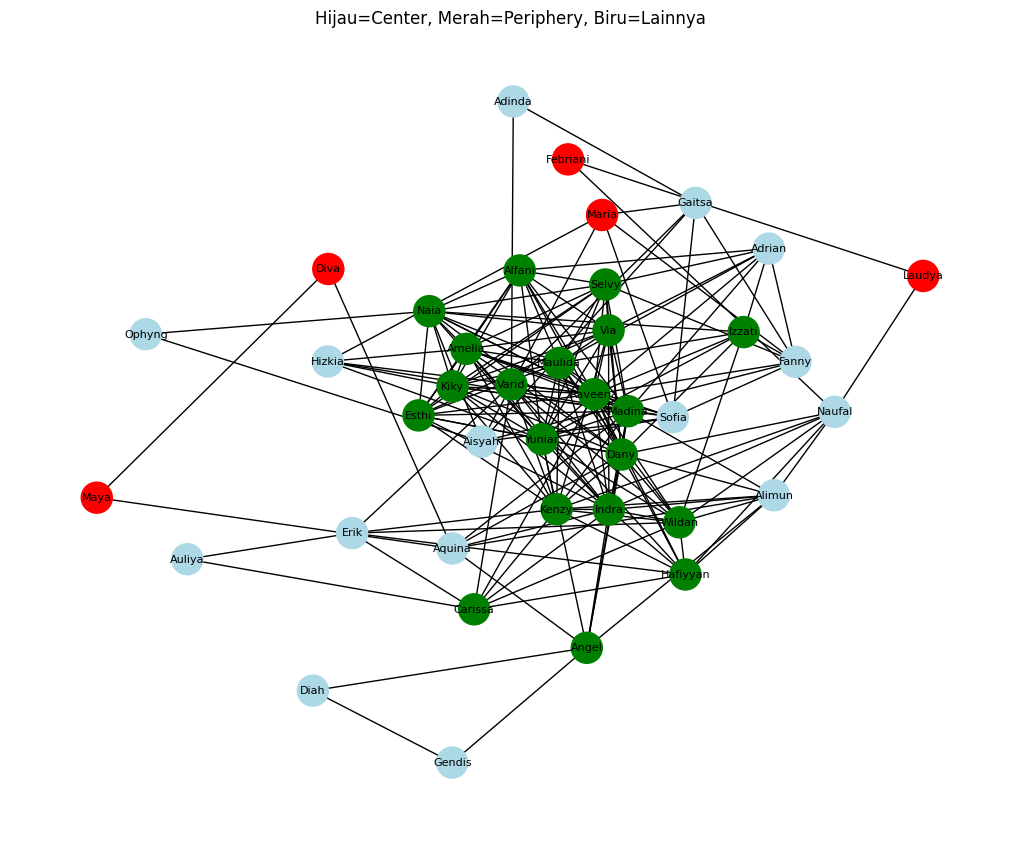


=== REKOMENDASI PENAMBAHAN EDGE STRATEGIS ===
Top 5 edge yang paling efektif mengurangi diameter:
- Hubungkan ('Maria', 'Wildan'): Diameter 5 → 4 (turun 1)
- Hubungkan ('Maria', 'Alimun'): Diameter 5 → 4 (turun 1)
- Hubungkan ('Maria', 'Carissa'): Diameter 5 → 4 (turun 1)
- Hubungkan ('Maria', 'Hafiyyan'): Diameter 5 → 4 (turun 1)
- Hubungkan ('Maria', 'Kenzy'): Diameter 5 → 4 (turun 1)

=== HEATMAP JARAK ANTAR NODE ===


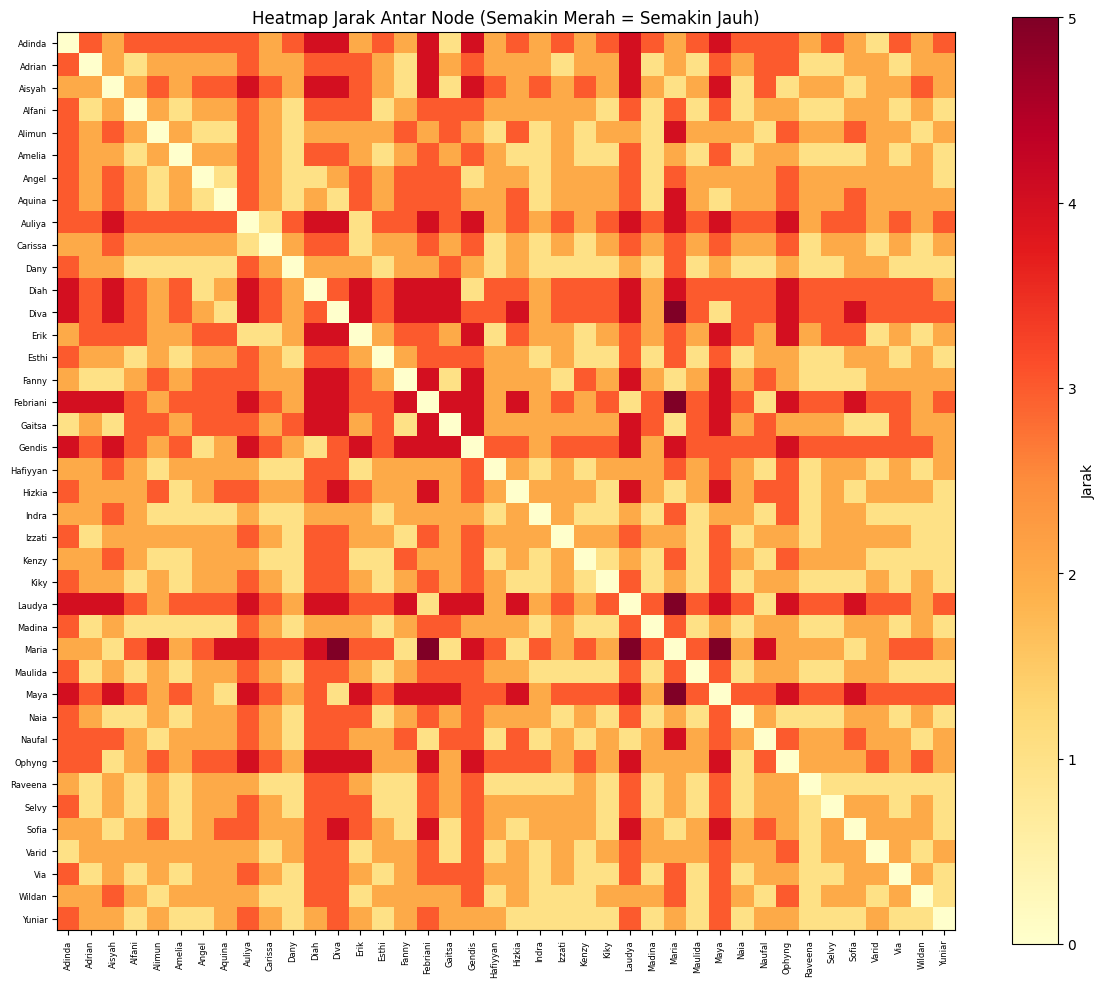

In [14]:
print("ANALISIS TAMBAHAN 2: ANALISIS STRUKTUR DAN OPTIMASI JARINGAN")

# Analisis 1: Identifikasi Komunitas yang Terisolasi
print("\n=== ANALISIS KOMUNITAS TERISOLASI ===")
# Deteksi komunitas menggunakan Louvain atau Girvan-Newman
from networkx.algorithms import community
communities = list(community.greedy_modularity_communities(G))

print(f"Jumlah komunitas terdeteksi: {len(communities)}")
for i, comm in enumerate(communities, 1):
    print(f"Komunitas {i}: {list(comm)}")

# Hitung jarak antar komunitas
print("\n=== JARAK ANTAR KOMUNITAS ===")
inter_community_distances = []
for i, comm1 in enumerate(communities):
    for j, comm2 in enumerate(communities):
        if i < j:
            min_dist = float('inf')
            closest_pair = None
            for n1 in comm1:
                for n2 in comm2:
                    try:
                        dist = nx.shortest_path_length(G, n1, n2)
                        if dist < min_dist:
                            min_dist = dist
                            closest_pair = (n1, n2)
                    except:
                        pass
            if closest_pair:
                inter_community_distances.append({
                    'comm1': i+1, 'comm2': j+1,
                    'distance': min_dist, 'bridge': closest_pair
                })
                print(f"Komunitas {i+1} ↔ Komunitas {j+1}: Jarak {min_dist} via {closest_pair}")

# Analisis 2: Eccentricity Analysis (Mendeteksi Node Pinggiran)
print("\n=== ANALISIS ECCENTRICITY (NODE PINGGIRAN) ===")
eccentricity = nx.eccentricity(G)
diameter = nx.diameter(G)
radius = nx.radius(G)
center = nx.center(G)
periphery = nx.periphery(G)

print(f"Diameter jaringan: {diameter}")
print(f"Radius jaringan: {radius}")
print(f"Center nodes (paling sentral): {center}")
print(f"Periphery nodes (paling pinggiran): {periphery}")

# Visualisasi center vs periphery
colors = []
for node in G.nodes():
    if node in center:
        colors.append('green')
    elif node in periphery:
        colors.append('red')
    else:
        colors.append('lightblue')

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color=colors,
        font_size=8, node_size=500)
plt.title("Hijau=Center, Merah=Periphery, Biru=Lainnya", fontsize=12)
plt.show()

# Analisis tambahan 3: Rekomendasi Edge Strategis
print("\n=== REKOMENDASI PENAMBAHAN EDGE STRATEGIS ===")
# Cari pasangan node yang jika dihubungkan akan paling efektif mengurangi diameter
best_edges = []
for i, comm1 in enumerate(communities):
    for j, comm2 in enumerate(communities):
        if i < j:
            # Cari node terbaik dari masing-masing komunitas
            for n1 in comm1:
                for n2 in comm2:
                    if not G.has_edge(n1, n2):
                        # Simulasi penambahan edge
                        G_test = G.copy()
                        G_test.add_edge(n1, n2)
                        new_diameter = nx.diameter(G_test)
                        reduction = diameter - new_diameter
                        if reduction > 0:
                            best_edges.append({
                                'edge': (n1, n2),
                                'reduction': reduction,
                                'new_diameter': new_diameter
                            })

# Urutkan berdasarkan pengurangan diameter terbesar
best_edges = sorted(best_edges, key=lambda x: x['reduction'], reverse=True)[:5]
print("Top 5 edge yang paling efektif mengurangi diameter:")
for edge_info in best_edges:
    print(f"- Hubungkan {edge_info['edge']}: Diameter {diameter} → {edge_info['new_diameter']} (turun {edge_info['reduction']})")

# Analisis tambahan 4: Heatmap Jarak Antar Node
print("\n=== HEATMAP JARAK ANTAR NODE ===")
import numpy as np

nodes = list(G.nodes())
n = len(nodes)
dist_matrix = np.zeros((n, n))

for i, node1 in enumerate(nodes):
    for j, node2 in enumerate(nodes):
        if node1 in all_pairs and node2 in all_pairs[node1]:
            dist_matrix[i][j] = all_pairs[node1][node2]
        else:
            dist_matrix[i][j] = np.inf

plt.figure(figsize=(12, 10))
plt.imshow(dist_matrix, cmap='YlOrRd', interpolation='nearest')
plt.colorbar(label='Jarak')
plt.xticks(range(n), nodes, rotation=90, fontsize=6)
plt.yticks(range(n), nodes, fontsize=6)
plt.title('Heatmap Jarak Antar Node (Semakin Merah = Semakin Jauh)', fontsize=12)
plt.tight_layout()
plt.show()